### ML

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import set_matplotlib_hangul

In [3]:
df = pd.read_csv('Fin.csv', index_col=0)
df

출연자                                                 제목   회차     조회수  \
0    나영석              [선공개] 유퀴즈에 포위된 나영석 PD! 형이 왜 거기서 나와..?   40  881349   
1    이명진                     드라마를 위해 조셉과 거래(?) 하는 이명진PD님 |    40     173   
2    김부연  [#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...   41     593   
3    김유자  [#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...   41     593   
4    김만순  [#유퀴즈] 41화 레전드! ′X줄(?) 타는 스카이워크′부터 ′돌아온 의자 브레이...   41     593   
..   ...                                                ...  ...     ...   
830  유연수              음주 운전 사고로 축구 선수 생활을 잃었습니다 #highlight#  228  204607   
831  박인비              첫인상 사투리 쓰는 아저씨?! 골프가 이어준 인연! 박인비♥남기협#  228   81779   
832  김영옥     연륜만큼 맵고 찰지다는 김영옥 X 나문희 자기님의 입담 ㅋㅋㅋ #highlight#  229  508075   
833  나문희     연륜만큼 맵고 찰지다는 김영옥 X 나문희 자기님의 입담 ㅋㅋㅋ #highlight#  229  508075   
834  신영철            내가 도파민 중독자? 일시적인 쾌감에 속지 마세요 #highlight#  229  234968   

     좋아요수  댓글수  재생시간(초)     구독자수  term    시청률    직업 성별  나이 수상여부 인지도  
0    6186  224      314        0  1290  2.600   서비스  M  중년    Y   Y  
1       1    1      109        0  1290  2.600   서비스  M  청년    N   N  
2       4    1      394        0  1290  2.700    기타  F  중년    N   N  
3       4    1      394        0  1290  2.700    기타  F  청년    N   N  
4       4    1      394        0  1290  2.700    기타  F  노년    N   N  
..    ...  ...      ...      ...   ...    ...   ... ..  ..  ...  ..  
830  2509  414      983  894,000    29  4.912  운동선수  M  청년    Y   Y  
831   500   36      501  894,000    29  4.912  운동선수  F  청년    Y   Y  
832  5183  186     1044  897,000    22  4.468   연예인  F  노년    Y   Y  
833  5183  186     1044  897,000    22  4.468   연예인  F  노년    Y   Y  
834  2939  129     1106  897,000    22  4.468  사회복지  M  노년    Y   N  

[835 rows x 15 columns]

In [4]:
df = df.drop(['제목', '회차'], axis=1)

In [8]:
df1 = df.copy()
df12 = df1.drop(index=281, axis=0)

In [5]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 상관관계 분석

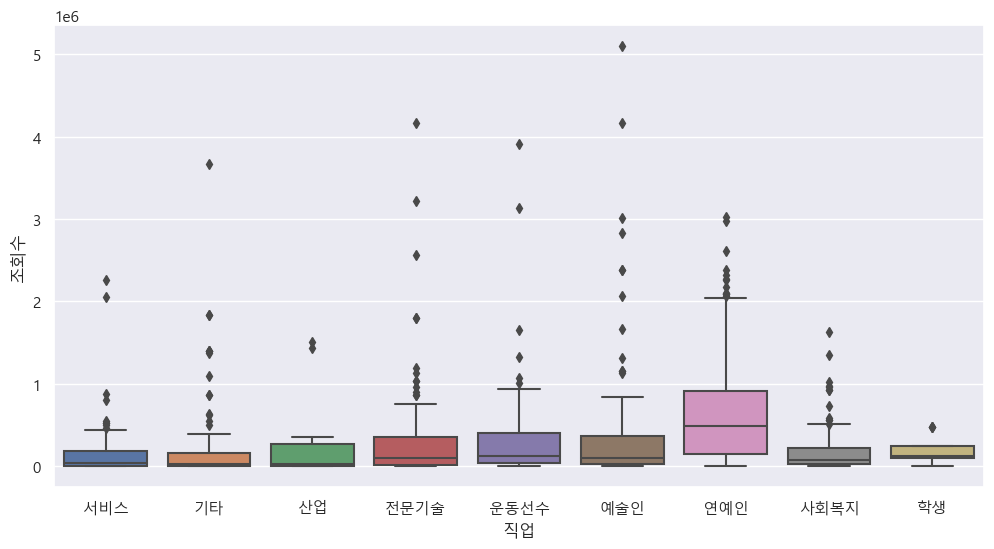

In [251]:
plt.figure(figsize=(12,6))
sns.boxplot(x='직업', y='조회수', data=df12);

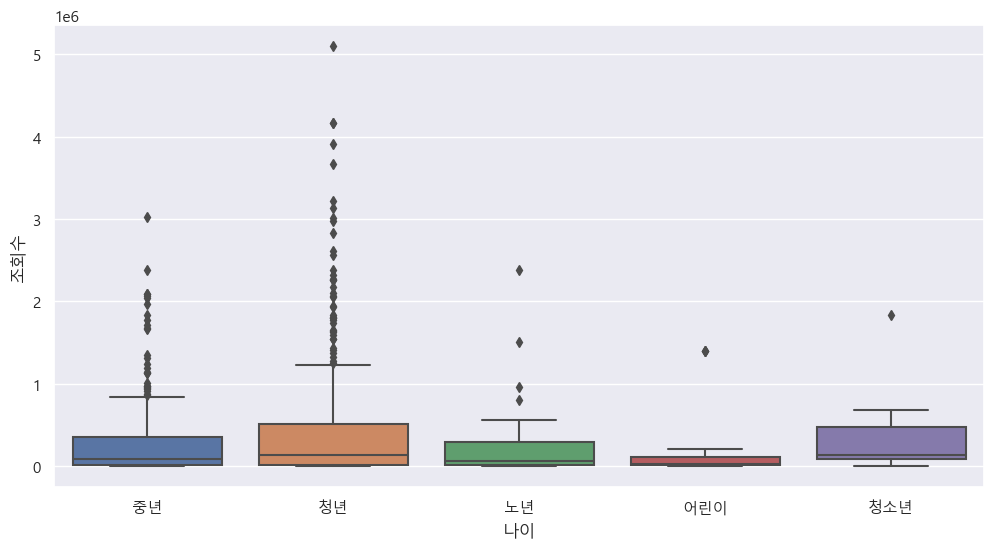

In [252]:
plt.figure(figsize=(12,6))
sns.boxplot(x='나이', y='조회수', data=df12);

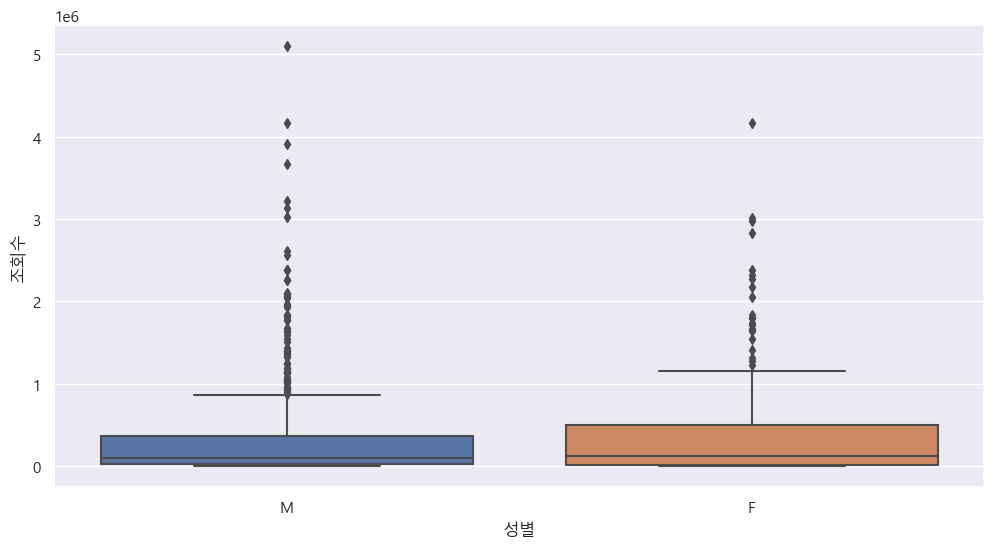

In [253]:
plt.figure(figsize=(12,6))
sns.boxplot(x='성별', y='조회수', data=df12);

<Axes: xlabel='좋아요수', ylabel='조회수'>

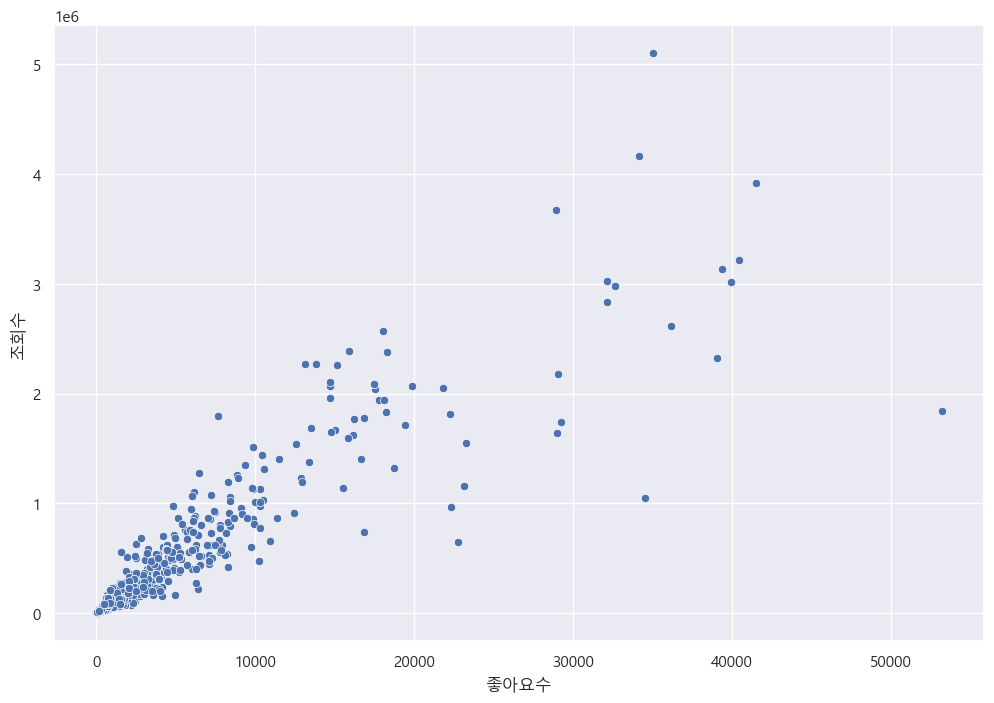

In [257]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df12, x ='좋아요수',y='조회수')

<Axes: xlabel='댓글수', ylabel='조회수'>

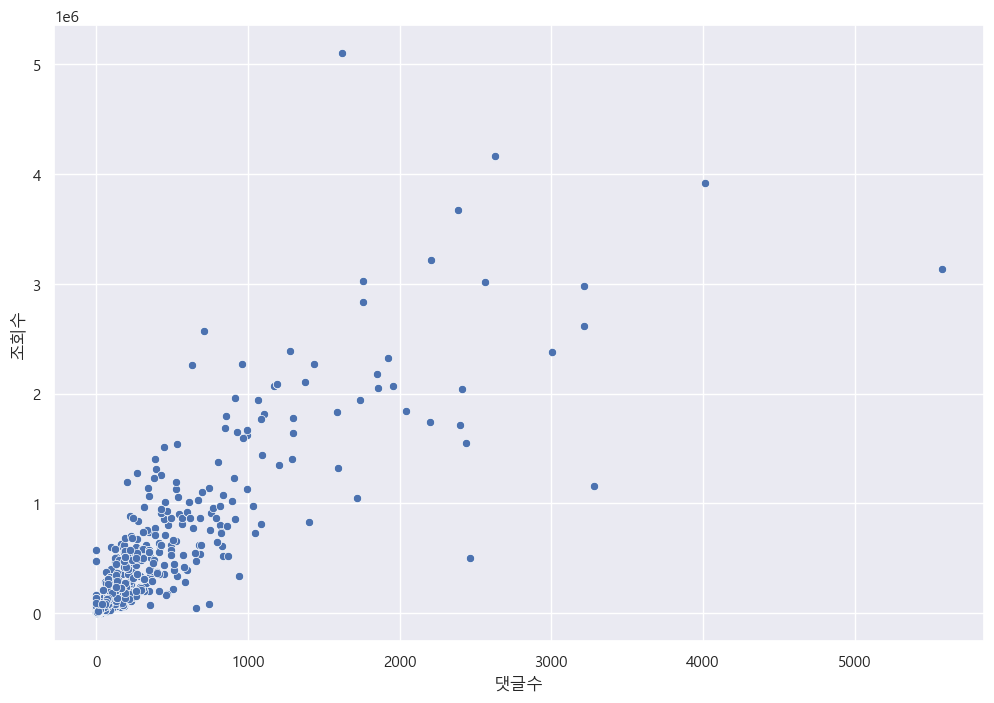

In [258]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df12, x ='댓글수',y='조회수')

<Axes: xlabel='좋아요수', ylabel='조회수'>

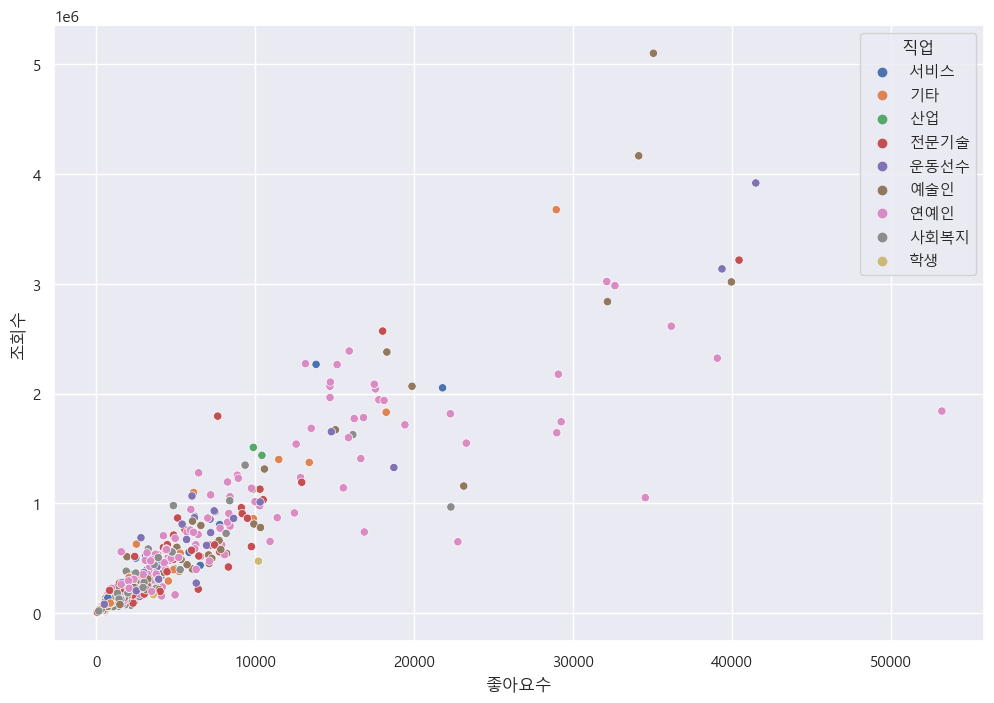

In [259]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df12, x ='좋아요수',y='조회수',hue='직업')

<Axes: xlabel='댓글수', ylabel='조회수'>

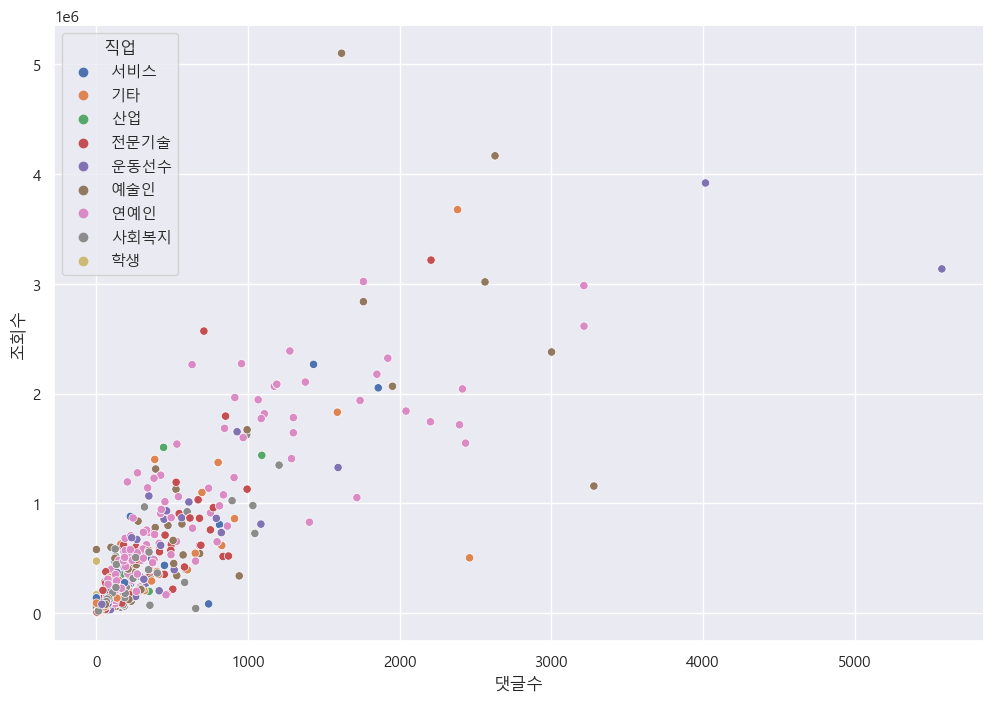

In [260]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df12, x ='댓글수',y='조회수',hue='직업')

<Axes: xlabel='댓글수', ylabel='조회수'>

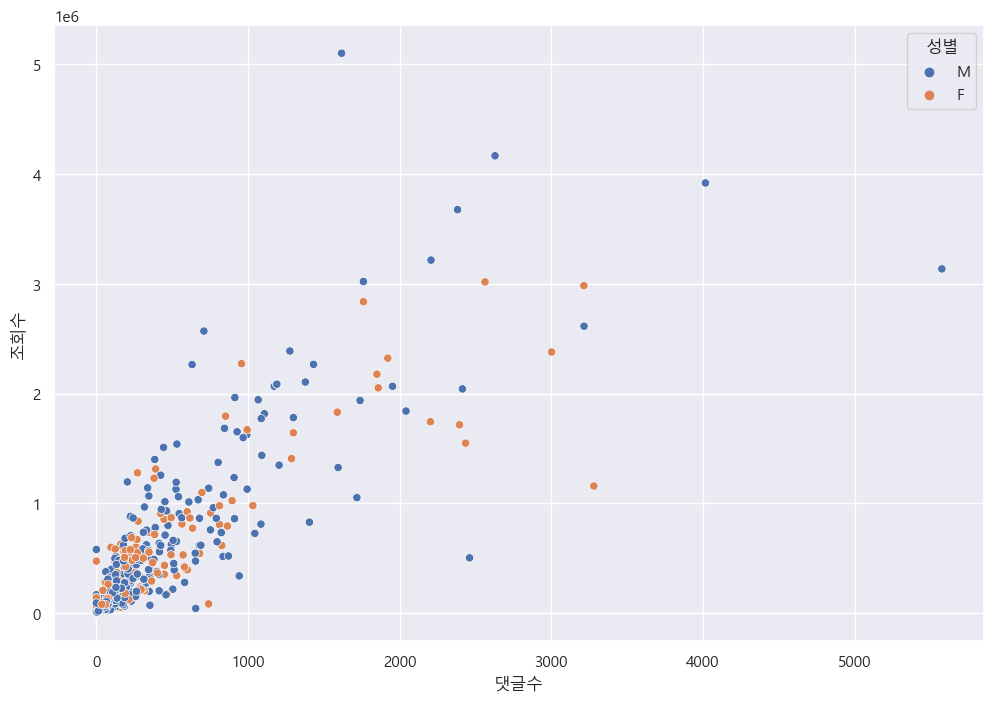

In [261]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df12, x ='댓글수',y='조회수',hue='성별')

<Axes: xlabel='댓글수', ylabel='조회수'>

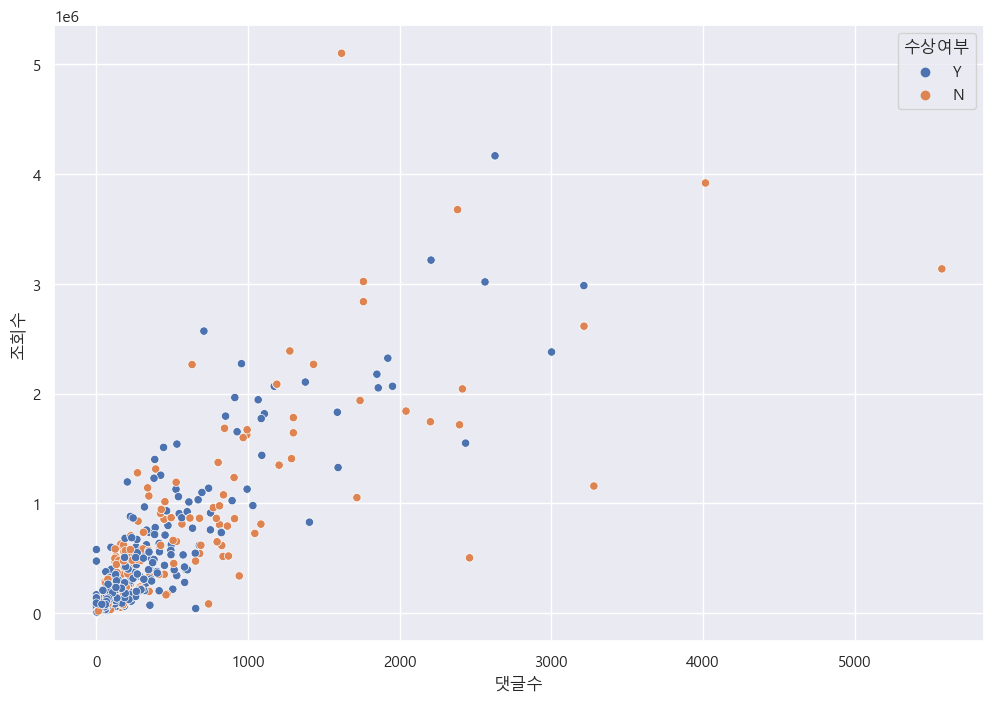

In [262]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df12, x ='댓글수',y='조회수',hue='수상여부')

<Axes: xlabel='댓글수', ylabel='조회수'>

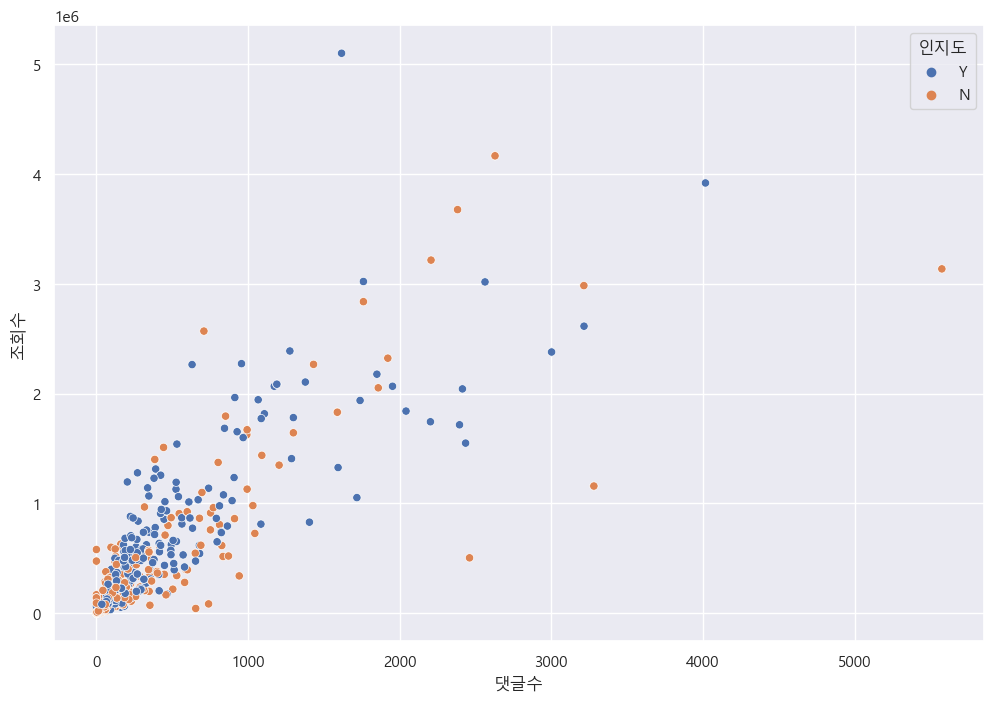

In [263]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df12, x ='댓글수',y='조회수',hue='인지도')

<Axes: xlabel='재생시간(초)', ylabel='조회수'>

c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\

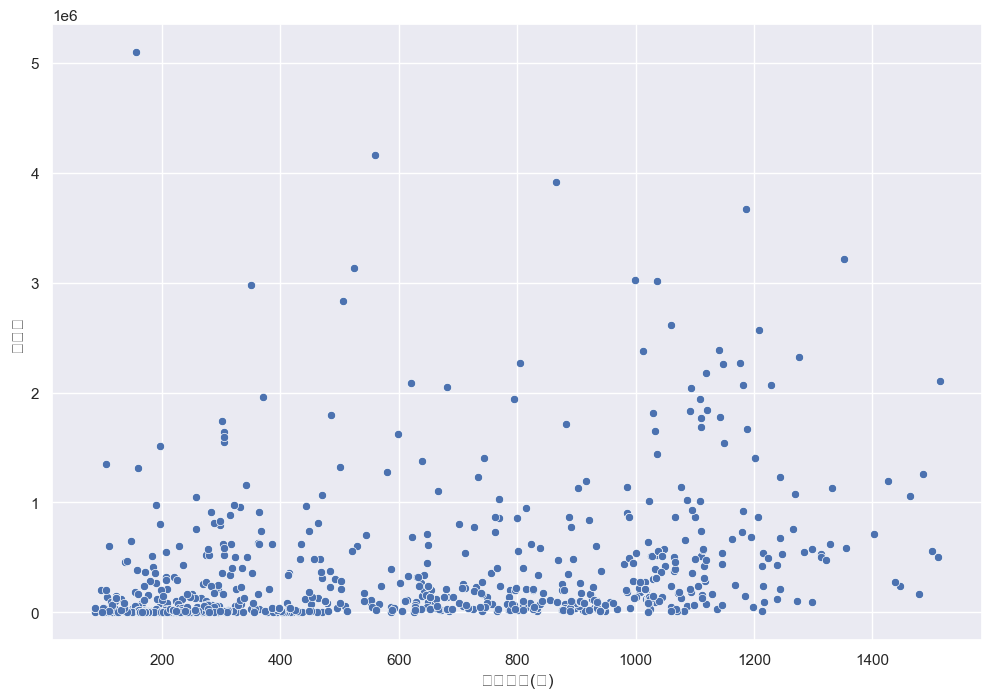

In [315]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df12, x ='재생시간(초)',y='조회수')

#### 범위 제한

In [264]:
#Dropping the outliers. 
df13 = df12[df12["조회수"]<100000]
df13 = df12[df12["댓글수"]<1000]
df13 = df12[(df12["좋아요수"]<10000)]

df13.shape

(756, 13)

<Axes: xlabel='댓글수', ylabel='조회수'>

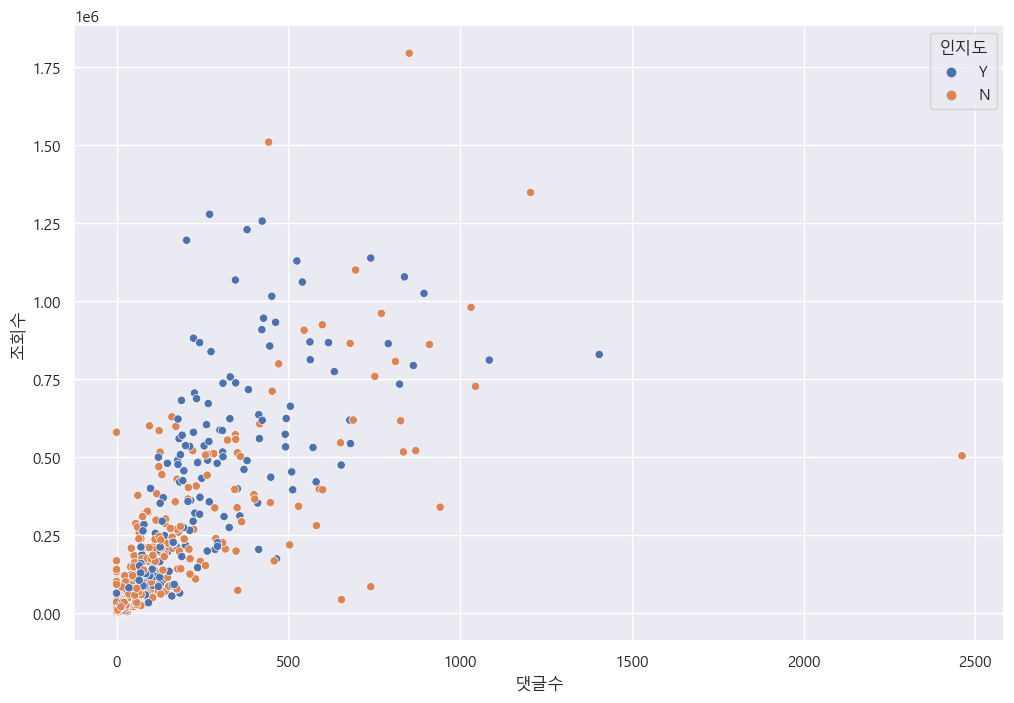

In [268]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df13, x ='댓글수',y='조회수',hue='인지도')

<Axes: xlabel='댓글수', ylabel='조회수'>

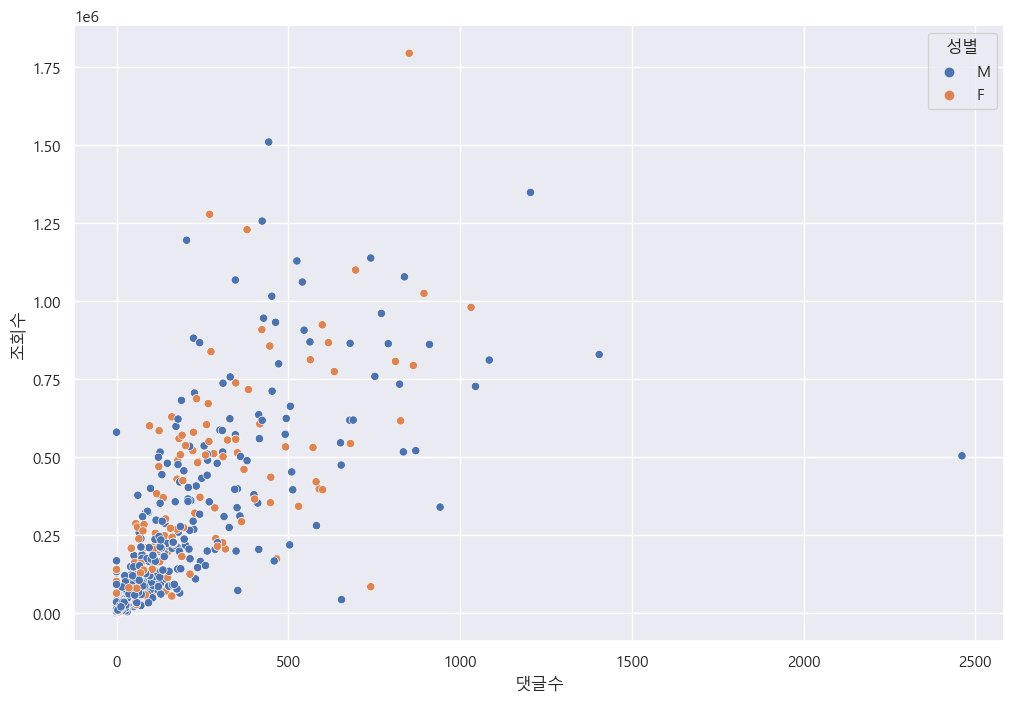

In [271]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df13, x ='댓글수',y='조회수',hue='성별')

<Axes: xlabel='댓글수', ylabel='좋아요수'>

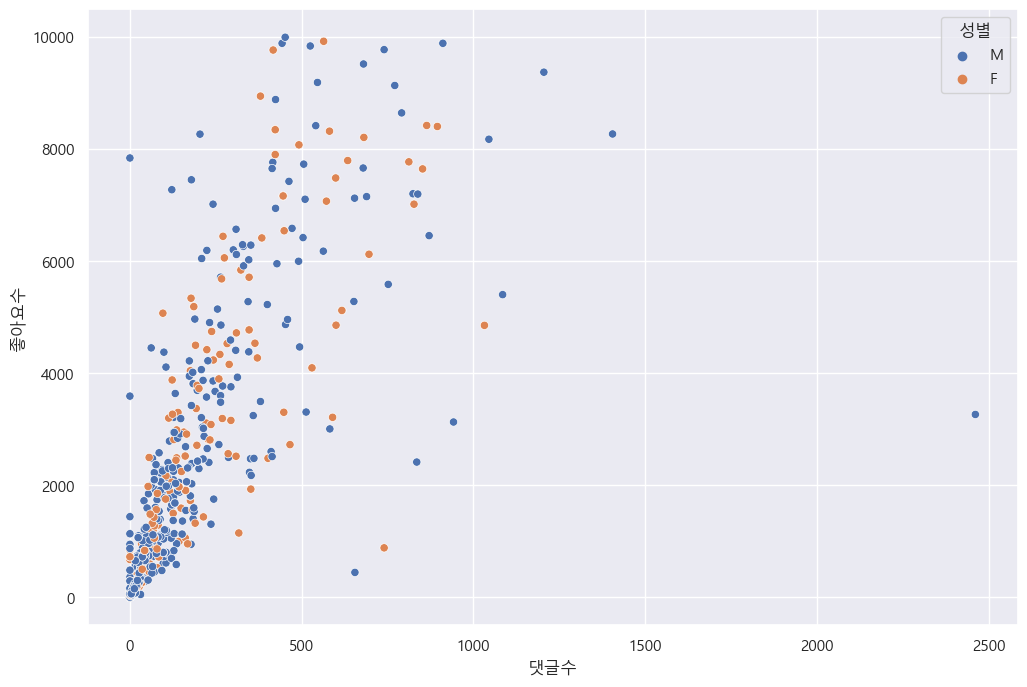

In [270]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df13, x ='댓글수',y='좋아요수',hue='성별')

C:\Users\HoJin\AppData\Local\Temp\ipykernel_4888\854284066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df12['조회수'])


<Axes: xlabel='조회수', ylabel='Density'>

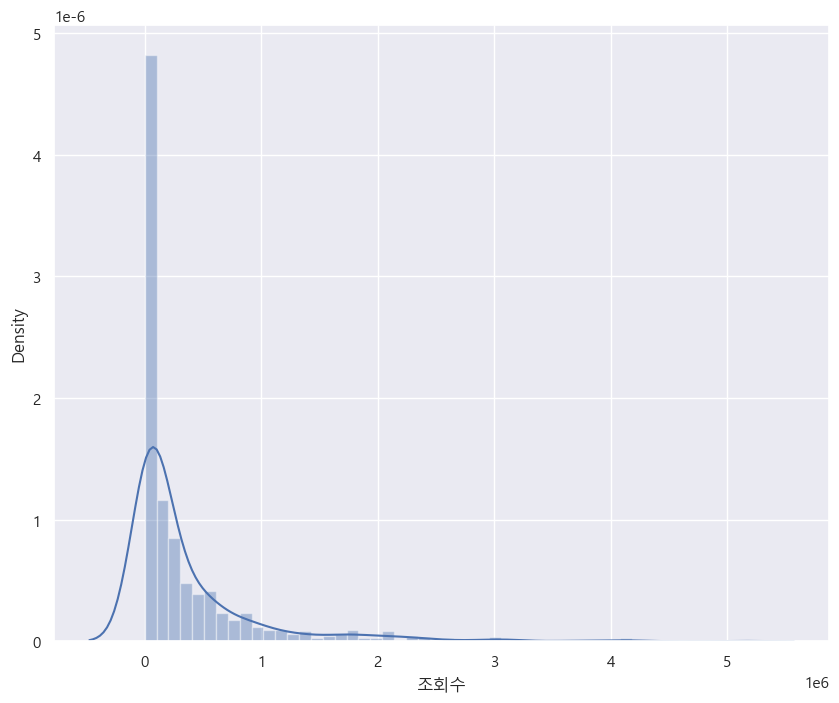

In [272]:
plt.figure(figsize=(10,8))
sns.distplot(df12['조회수'])

```
따로 구성을 하고 모델 그리기 y는 1개만 사용

벗어난 애들을 하고 다시 그리기

아웃라이어??
```

C:\Users\HoJin\AppData\Local\Temp\ipykernel_4888\344138409.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df12['시청률'])


<Axes: xlabel='시청률', ylabel='Density'>

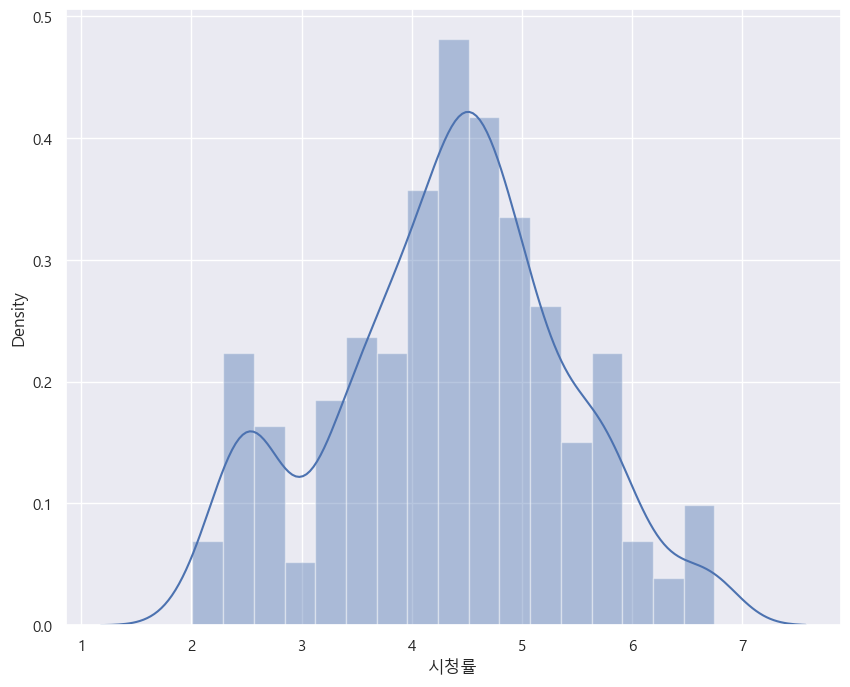

In [273]:
plt.figure(figsize=(10,8))
sns.distplot(df12['시청률'])

#### 라벨인코딩

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
for column in ['수상여부', '인지도', '성별', '직업', '나이']:
    le.fit(df1[column])
    df1[column] = le.transform(df[column])

In [10]:
le.classes_

array(['노년', '어린이', '중년', '청년', '청소년'], dtype=object)

In [11]:
df1[df1['출연자'] == 'BTS']

출연자       조회수     좋아요수    댓글수  재생시간(초)    구독자수  term   시청률  직업  성별  나이  \
281  BTS  32093523  1137001  31668      797  534870  1052  6.74   4   1   3   

     수상여부  인지도  
281     1    1

In [12]:
df1['구독자수'] = df1['구독자수'].str.replace(',', '')
# MinMaxScaler, StandardScaler, RobustScaler

# df2 = df1.drop(['출연자'], axis=1)
# df2 = df1.drop(['term'], axis=1)
df2 = df1.drop(index=281, axis=0)
df2['구독자수'] = df2['구독자수'].astype(int)

In [13]:
df2

출연자     조회수  좋아요수  댓글수  재생시간(초)    구독자수  term    시청률  직업  성별  나이  수상여부  \
0    나영석  881349  6186  224      314       0  1290  2.600   3   1   2     1   
1    이명진     173     1    1      109       0  1290  2.600   3   1   3     0   
2    김부연     593     4    1      394       0  1290  2.700   0   0   2     0   
3    김유자     593     4    1      394       0  1290  2.700   0   0   3     0   
4    김만순     593     4    1      394       0  1290  2.700   0   0   0     0   
..   ...     ...   ...  ...      ...     ...   ...    ...  ..  ..  ..   ...   
830  유연수  204607  2509  414      983  894000    29  4.912   6   1   3     1   
831  박인비   81779   500   36      501  894000    29  4.912   6   0   3     1   
832  김영옥  508075  5183  186     1044  897000    22  4.468   4   0   0     1   
833  나문희  508075  5183  186     1044  897000    22  4.468   4   0   0     1   
834  신영철  234968  2939  129     1106  897000    22  4.468   1   1   0     1   

     인지도  
0      1  
1      0  
2      0  
3      0  
4      0  
..   ...  
830    1  
831    1  
832    1  
833    1  
834    0  

[834 rows x 13 columns]

### 상관관계 분석

c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

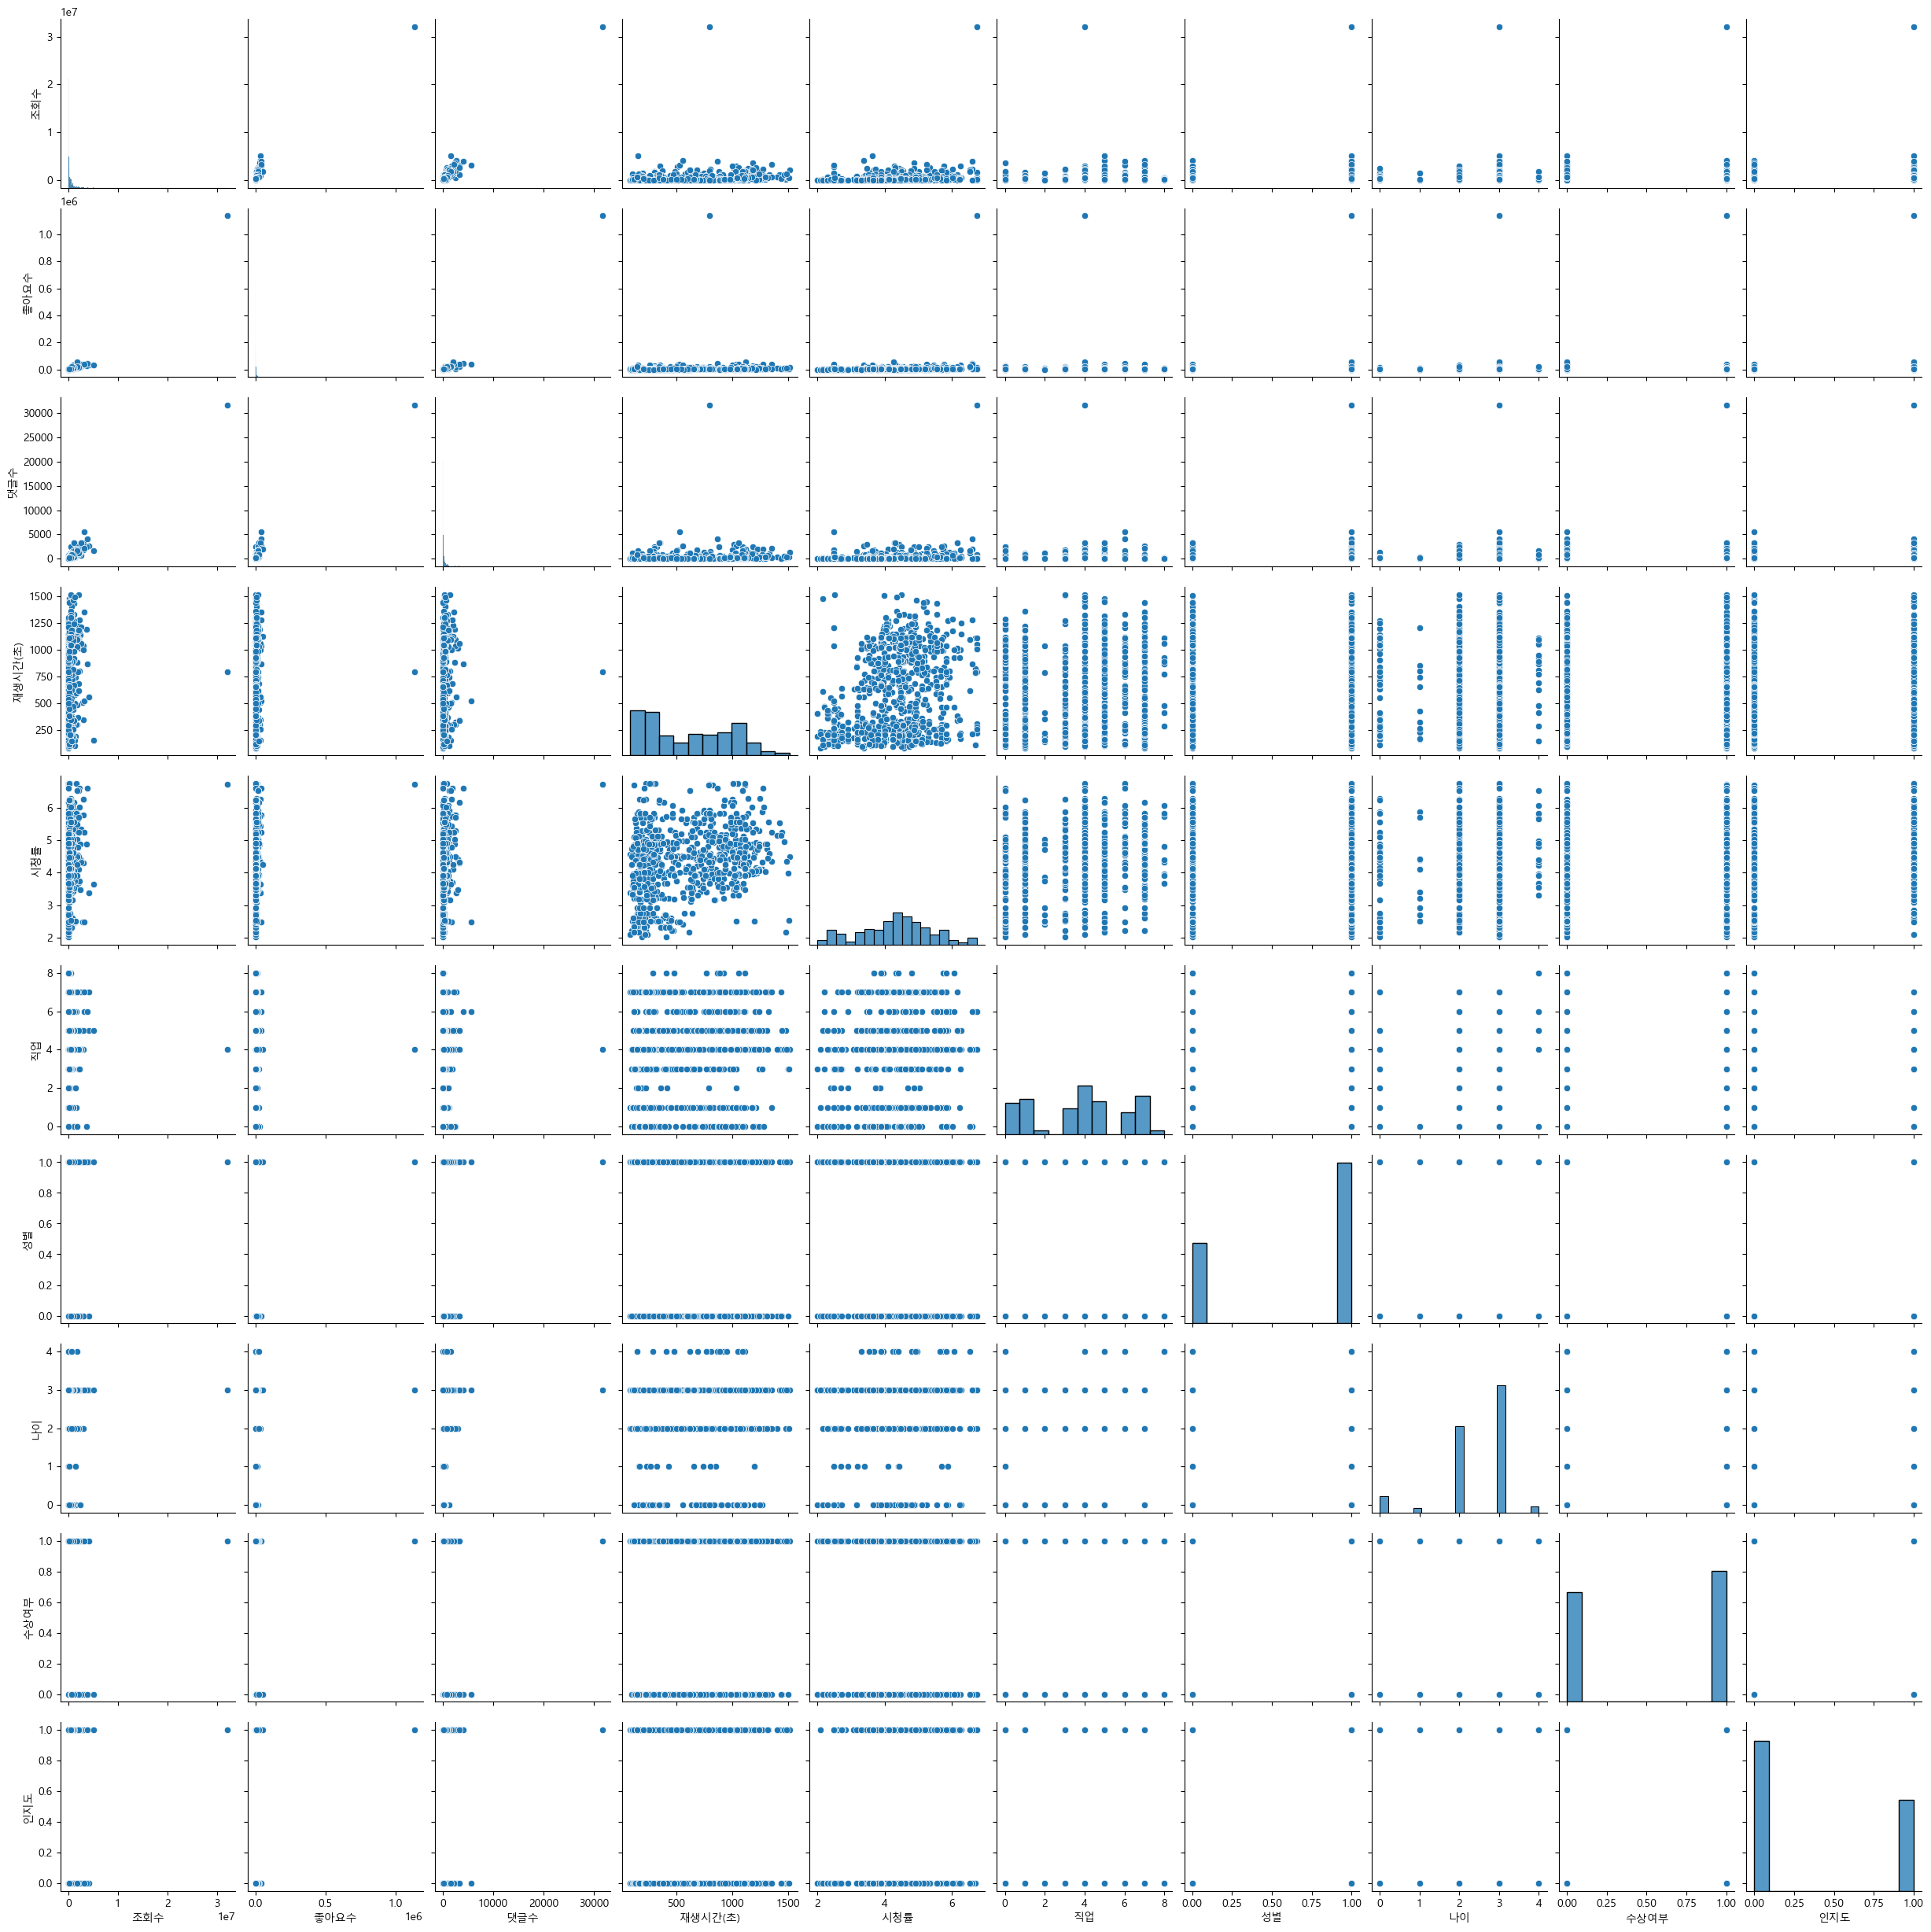

In [114]:
plt.figure(figsize=(12,6))
sns.pairplot(data=df3)

c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

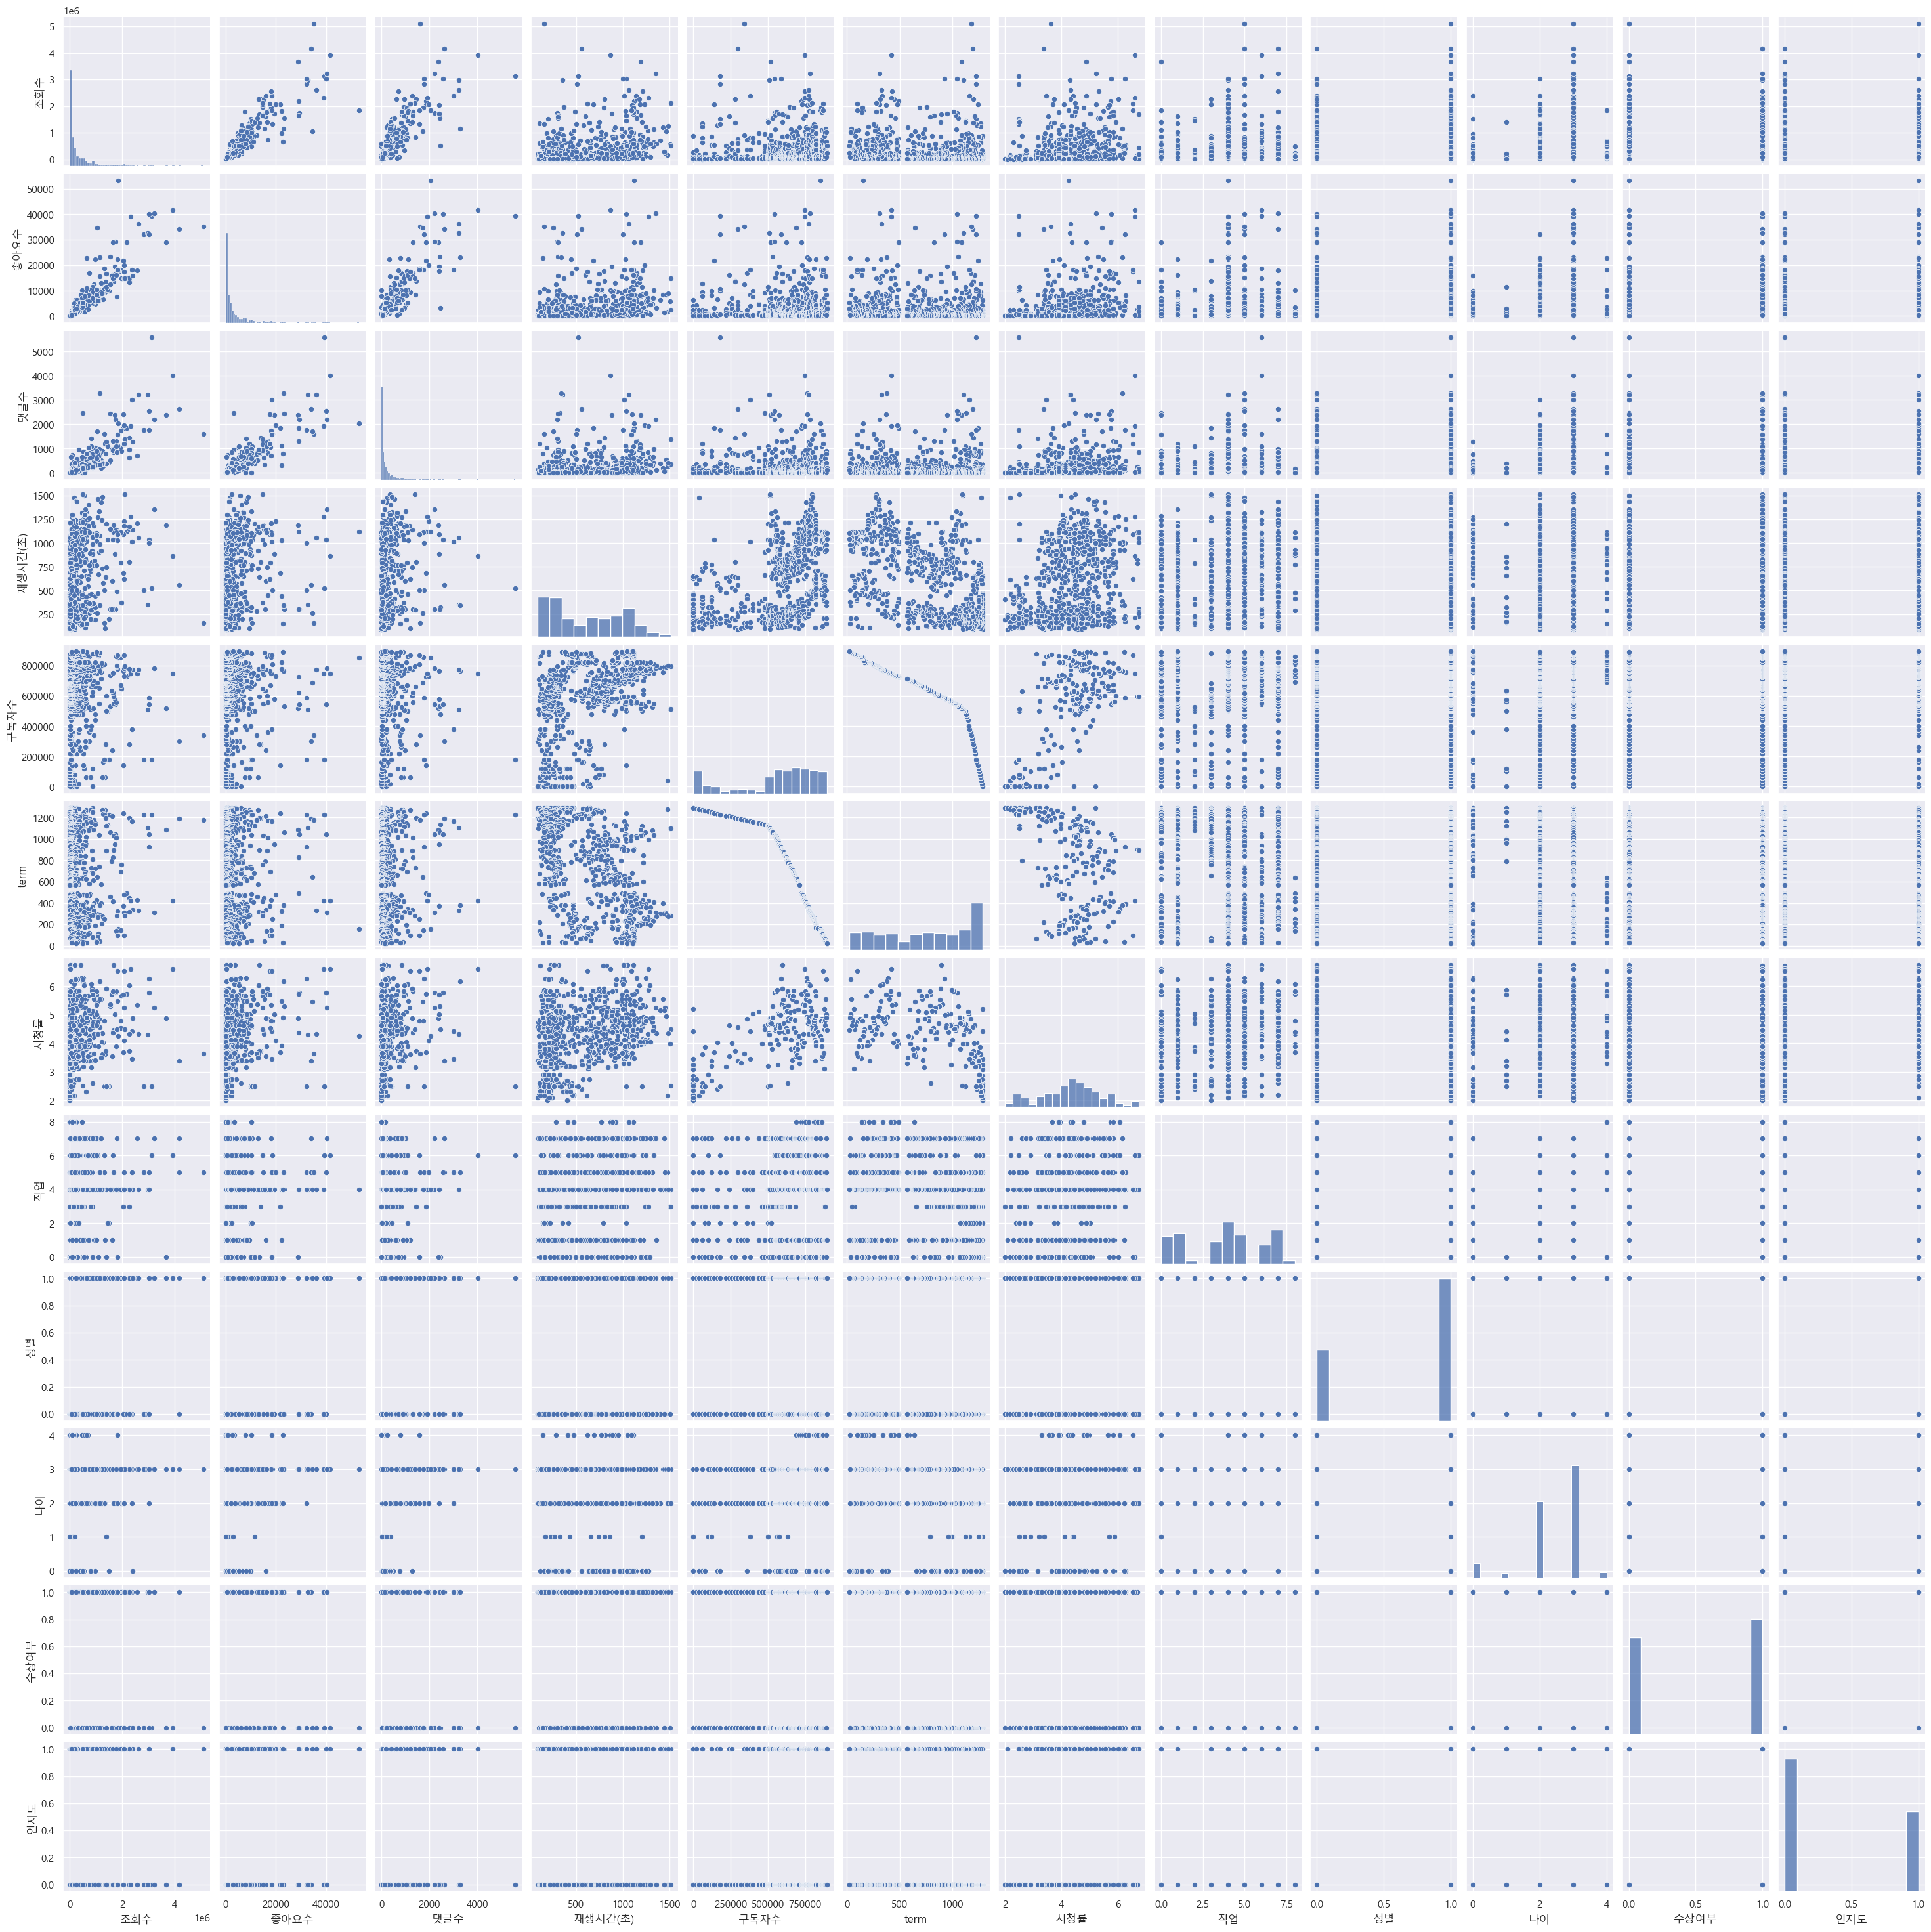

In [280]:
plt.figure(figsize=(12,6))
sns.pairplot(data=df2)

- r2 score 을 쓰는 이유
- 두 컬럼의 서로에게 얼마나 종속되어있는지를 확인하는 기능

- 좋아요 댓글수는 사용해도 좋다!!

- 상관관계는 얼마나 선형적인 관계가 있는지를 보여주는 지표일뿐 있으면 좋다

c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

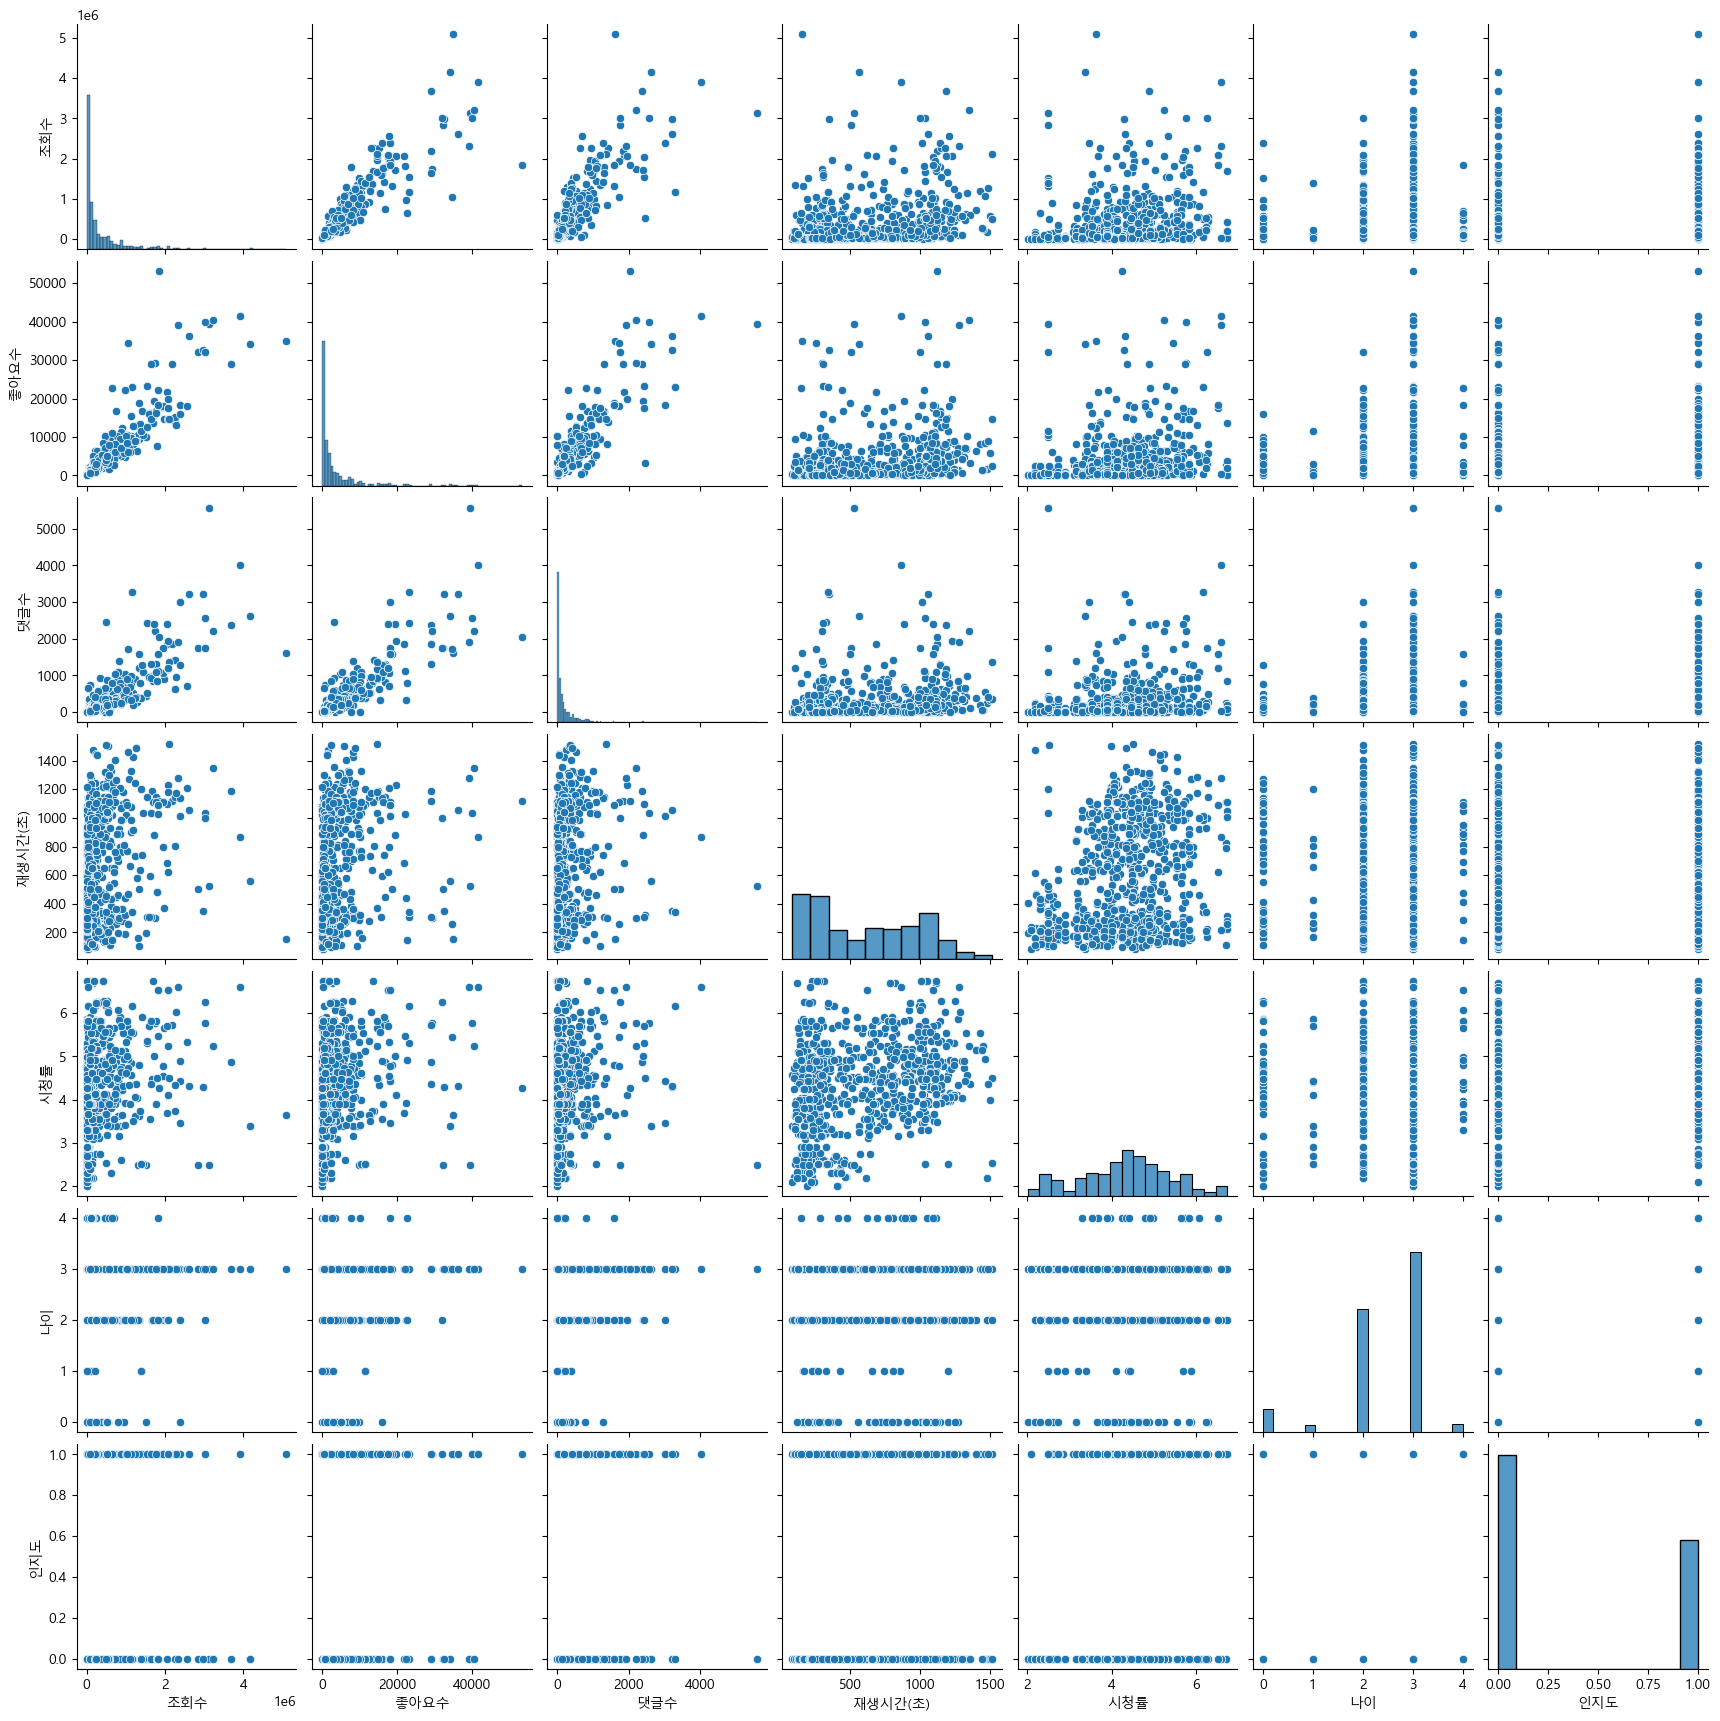

In [117]:
plt.figure(figsize=(12,6))
sns.pairplot(data=df5);

<Axes: >

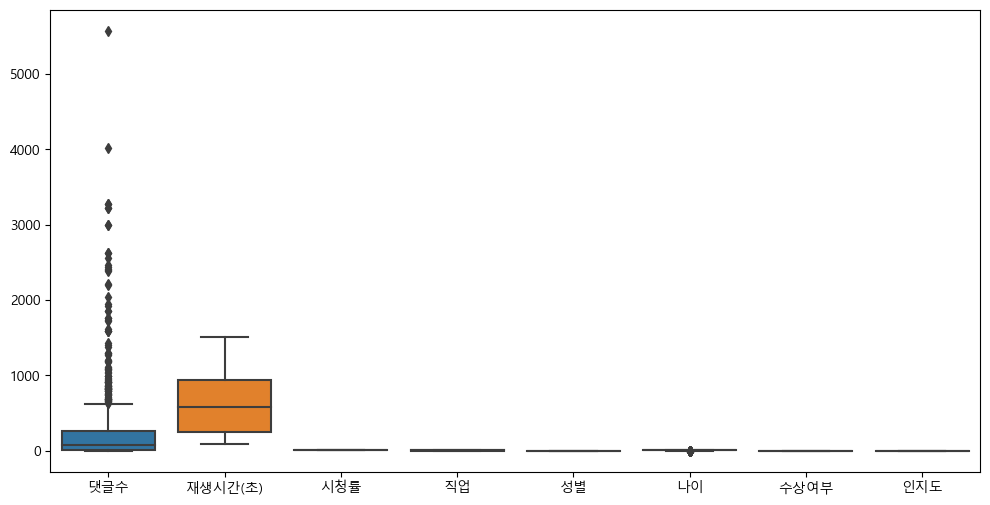

In [99]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df4)

In [281]:
df2

출연자     조회수  좋아요수  댓글수  재생시간(초)    구독자수  term    시청률  직업  성별  나이  수상여부  \
0    나영석  881349  6186  224      314       0  1290  2.600   3   1   2     1   
1    이명진     173     1    1      109       0  1290  2.600   3   1   3     0   
2    김부연     593     4    1      394       0  1290  2.700   0   0   2     0   
3    김유자     593     4    1      394       0  1290  2.700   0   0   3     0   
4    김만순     593     4    1      394       0  1290  2.700   0   0   0     0   
..   ...     ...   ...  ...      ...     ...   ...    ...  ..  ..  ..   ...   
830  유연수  204607  2509  414      983  894000    29  4.912   6   1   3     1   
831  박인비   81779   500   36      501  894000    29  4.912   6   0   3     1   
832  김영옥  508075  5183  186     1044  897000    22  4.468   4   0   0     1   
833  나문희  508075  5183  186     1044  897000    22  4.468   4   0   0     1   
834  신영철  234968  2939  129     1106  897000    22  4.468   1   1   0     1   

     인지도  
0      1  
1      0  
2      0  
3      0  
4      0  
..   ...  
830    1  
831    1  
832    1  
833    1  
834    0  

[834 rows x 13 columns]

In [286]:
df3 = df2.copy()
df3 = df3.drop(['출연자'], axis=1)

In [287]:
df3.corr()

조회수      좋아요수       댓글수   재생시간(초)      구독자수      term       시청률  \
조회수      1.000000  0.908483  0.843228  0.294318  0.135193 -0.117746  0.173006   
좋아요수     0.908483  1.000000  0.873620  0.261672  0.147792 -0.126461  0.193296   
댓글수      0.843228  0.873620  1.000000  0.196726  0.088622 -0.060366  0.158966   
재생시간(초)  0.294318  0.261672  0.196726  1.000000  0.501143 -0.504602  0.300143   
구독자수     0.135193  0.147792  0.088622  0.501143  1.000000 -0.897491  0.647383   
term    -0.117746 -0.126461 -0.060366 -0.504602 -0.897491  1.000000 -0.453463   
시청률      0.173006  0.193296  0.158966  0.300143  0.647383 -0.453463  1.000000   
직업       0.099059  0.102060  0.070666  0.109434  0.230777 -0.175316  0.247092   
성별      -0.010557 -0.004923 -0.013523  0.071791  0.124181 -0.069329  0.061513   
나이       0.100359  0.109393  0.089114  0.003479  0.074246 -0.114525  0.065633   
수상여부    -0.026075 -0.036466 -0.038570  0.066086  0.196509 -0.194146  0.079039   
인지도      0.226696  0.227269  0.179836  0.184396  0.237402 -0.240717  0.297361   

               직업        성별        나이      수상여부       인지도  
조회수      0.099059 -0.010557  0.100359 -0.026075  0.226696  
좋아요수     0.102060 -0.004923  0.109393 -0.036466  0.227269  
댓글수      0.070666 -0.013523  0.089114 -0.038570  0.179836  
재생시간(초)  0.109434  0.071791  0.003479  0.066086  0.184396  
구독자수     0.230777  0.124181  0.074246  0.196509  0.237402  
term    -0.175316 -0.069329 -0.114525 -0.194146 -0.240717  
시청률      0.247092  0.061513  0.065633  0.079039  0.297361  
직업       1.000000  0.038251  0.299494  0.082368  0.255776  
성별       0.038251  1.000000 -0.085086  0.040849  0.029749  
나이       0.299494 -0.085086  1.000000 -0.038932  0.102706  
수상여부     0.082368  0.040849 -0.038932  1.000000  0.046929  
인지도      0.255776  0.029749  0.102706  0.046929  1.000000

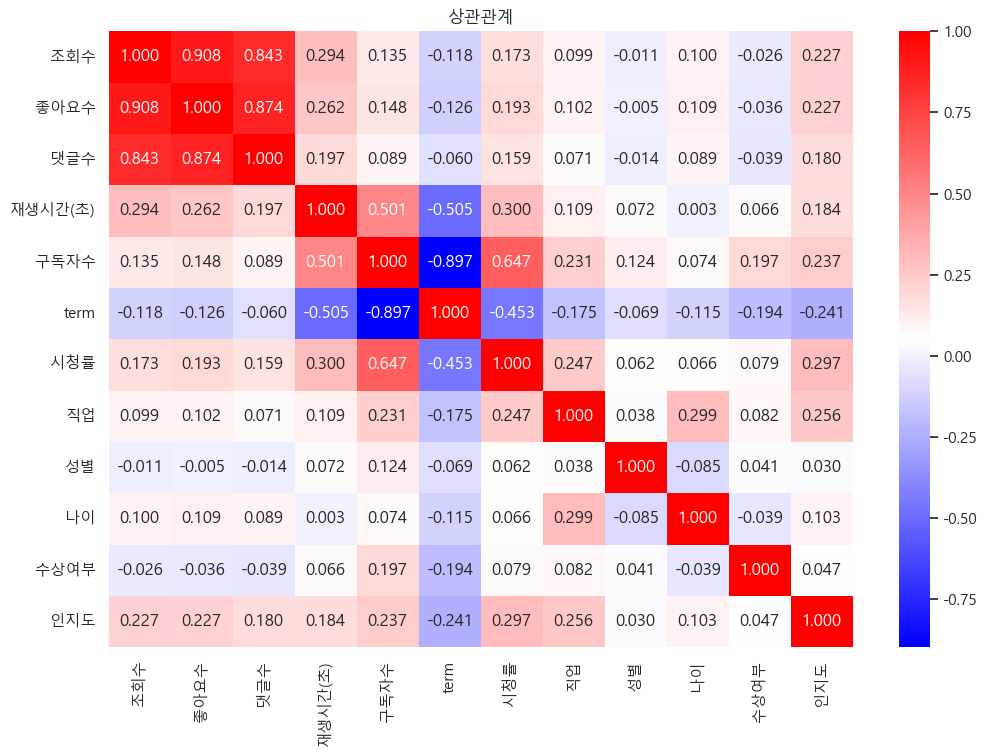

In [288]:
plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(), cmap='bwr', annot=True, fmt=".3f")
plt.title('상관관계')
plt.show();

c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\

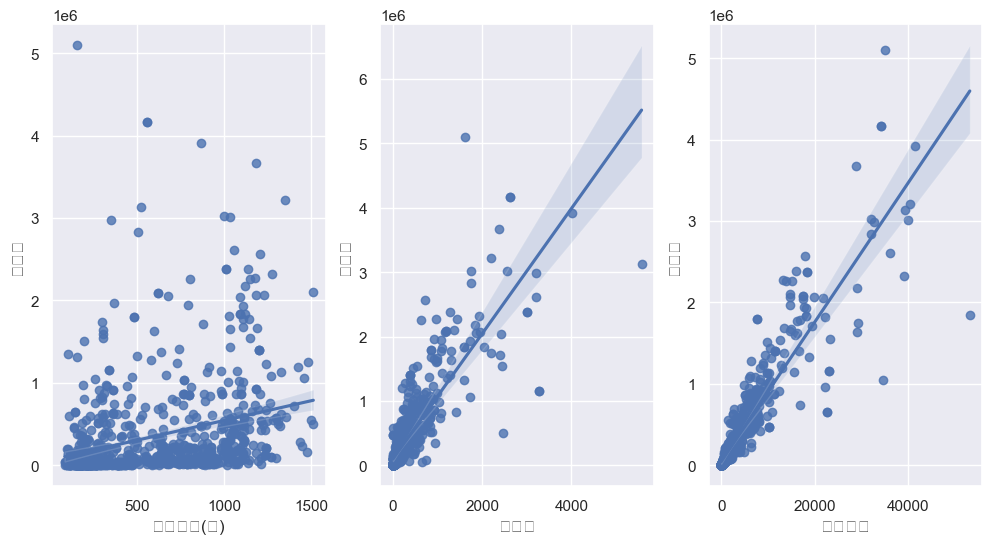

In [291]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})

fig, ax = plt.subplots(ncols=3)
sns.regplot(x='재생시간(초)', y='조회수', data=df3, ax=ax[0]);
sns.regplot(x='댓글수', y='조회수', data=df3, ax=ax[1]);
sns.regplot(x='좋아요수', y='조회수', data=df3, ax=ax[2]);

In [186]:
from scipy.stats import norm, skew
from scipy import stats

In [296]:
df4 = df3.copy()

In [317]:
df4.head(3)

조회수  좋아요수  댓글수  재생시간(초)  구독자수  term  시청률  직업  성별  나이  수상여부  인지도
0  881349  6186  224      314     0  1290  2.6   3   1   2     1    1
1     173     1    1      109     0  1290  2.6   3   1   3     0    0
2     593     4    1      394     0  1290  2.7   0   0   2     0    0

In [326]:
df4['time_cat'] = 0
df4.loc[(0 <= df4['재생시간(초)']) & (df4['재생시간(초)'] < 120), 'time_cat'] = '0_over_2'
df4.loc[(120 <= df4['재생시간(초)']) & (df4['재생시간(초)'] < 300), 'time_cat'] = '2_over_5'
df4.loc[(300 <= df4['재생시간(초)']) & (df4['재생시간(초)'] < 600), 'time_cat'] = '5_over_10'
df4.loc[(600 <= df4['재생시간(초)']) & (df4['재생시간(초)'] < 900), 'time_cat'] = '10_over_15'
df4.loc[900 <= df4['재생시간(초)'], 'time_cat'] = '15min_over'

In [327]:
df4

조회수  좋아요수  댓글수  재생시간(초)    구독자수  term    시청률  직업  성별  나이  수상여부  인지도  \
0    881349  6186  224      314       0  1290  2.600   3   1   2     1    1   
1       173     1    1      109       0  1290  2.600   3   1   3     0    0   
2       593     4    1      394       0  1290  2.700   0   0   2     0    0   
3       593     4    1      394       0  1290  2.700   0   0   3     0    0   
4       593     4    1      394       0  1290  2.700   0   0   0     0    0   
..      ...   ...  ...      ...     ...   ...    ...  ..  ..  ..   ...  ...   
830  204607  2509  414      983  894000    29  4.912   6   1   3     1    1   
831   81779   500   36      501  894000    29  4.912   6   0   3     1    1   
832  508075  5183  186     1044  897000    22  4.468   4   0   0     1    1   
833  508075  5183  186     1044  897000    22  4.468   4   0   0     1    1   
834  234968  2939  129     1106  897000    22  4.468   1   1   0     1    0   

       time_cat  
0     5_over_10  
1      0_over_2  
2     5_over_10  
3     5_over_10  
4     5_over_10  
..          ...  
830  15min_over  
831   5_over_10  
832  15min_over  
833  15min_over  
834  15min_over  

[834 rows x 13 columns]

In [328]:
df4['time_cat'].value_counts()

time_cat
2_over_5      245
15min_over    235
10_over_15    176
5_over_10     152
0_over_2       26
Name: count, dtype: int64

c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  func(*args, **kwargs)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\

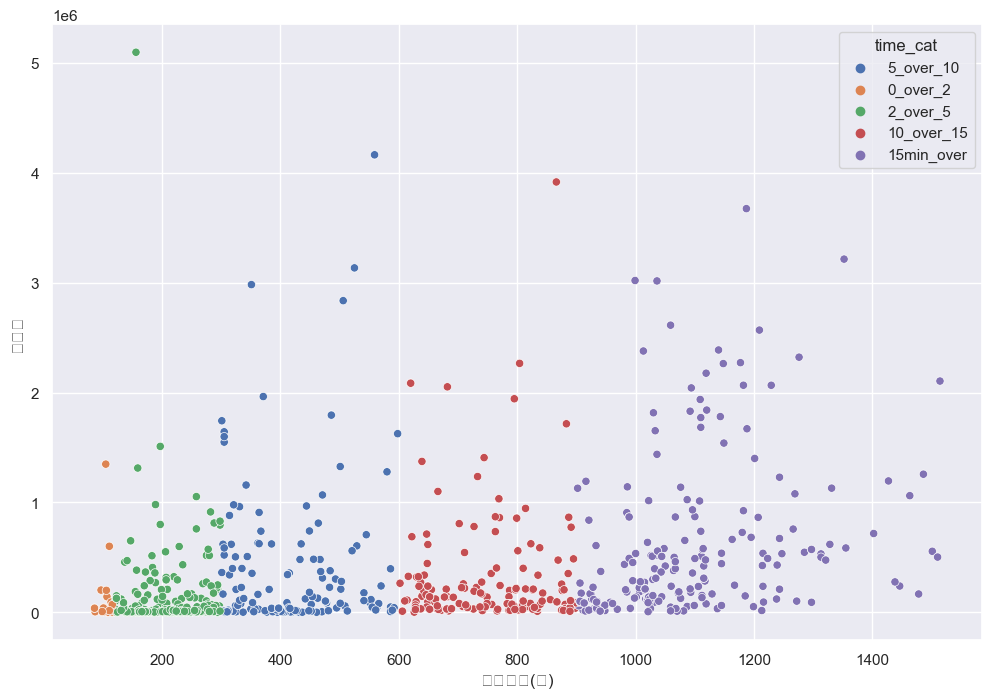

In [329]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df4, x ='재생시간(초)',y='조회수',hue='time_cat');

### 1시도

In [15]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [300]:
X = df4.drop(['시청률'], axis=1)
y = df4['시청률']

In [299]:
# y_train = np.log1p(y_train)

In [302]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=13).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [303]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [304]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [305]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [201]:
GBoost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,
                                   max_depth=4,
                                   min_samples_leaf=10, min_samples_split=5, 
                                   loss='ls', random_state =13)

In [306]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=2, n_estimators=100,
                             reg_alpha=0.5, reg_lambda=0.5,
                             subsample=0.5,
                             random_state =13, objective='reg:squarederror')

In [307]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=100,
                              max_bin = 3, bagging_fraction = 0.8,
                              bagging_freq = 5,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### kaggle

In [308]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.7305 (0.0207)



In [309]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.7305 (0.0207)



In [310]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warni

Kernel Ridge score: 1.5935 (0.6927)



In [311]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.5362 (0.0465)



In [312]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.5996 (0.0321)



In [313]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Auto-choosing ro

In [238]:
X_test = np.expm1(X_test) + 1

c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: overflow encountered in expm1
  result = func(self.values, **kwargs)


In [239]:
# 모델 학습
model_lgb.fit(X_train, y_train)
# X_test
# 예측
# y_pred = model.predict(np.array([[6]]))
y_pred = model_lgb.predict(X_test)
# 결과 출력
print("예측값:", y_pred)


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [240]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = model_lgb.predict(X_train)
pred_test = model_lgb.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train data : ', rmse_tr)
print('RMSE of Test data : ', rmse_test)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [333]:
df3

출연자     조회수  좋아요수  댓글수  재생시간(초)    구독자수  term    시청률  직업  성별  나이  수상여부  \
0    나영석  881349  6186  224      314       0  1290  2.600   3   1   2     1   
1    이명진     173     1    1      109       0  1290  2.600   3   1   3     0   
2    김부연     593     4    1      394       0  1290  2.700   0   0   2     0   
3    김유자     593     4    1      394       0  1290  2.700   0   0   3     0   
4    김만순     593     4    1      394       0  1290  2.700   0   0   0     0   
..   ...     ...   ...  ...      ...     ...   ...    ...  ..  ..  ..   ...   
830  유연수  204607  2509  414      983  894000    29  4.912   6   1   3     1   
831  박인비   81779   500   36      501  894000    29  4.912   6   0   3     1   
832  김영옥  508075  5183  186     1044  897000    22  4.468   4   0   0     1   
833  나문희  508075  5183  186     1044  897000    22  4.468   4   0   0     1   
834  신영철  234968  2939  129     1106  897000    22  4.468   1   1   0     1   

     인지도  
0      1  
1      0  
2      0  
3      0  
4      0  
..   ...  
830    1  
831    1  
832    1  
833    1  
834    0  

[834 rows x 13 columns]

```
직선에 가까운 형태: 데이터가 정규 분포에 가까울수록 직선에 가까운 형태를 보입니다.
꺾이거나 휘어진 형태: 데이터가 정규 분포에서 벗어날수록 확률 도표가 꺾이거나 휘어진 형태를 보입니다.
```

C:\Users\HoJin\AppData\Local\Temp\ipykernel_4888\3535843201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['시청률'] , fit=norm);
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: User

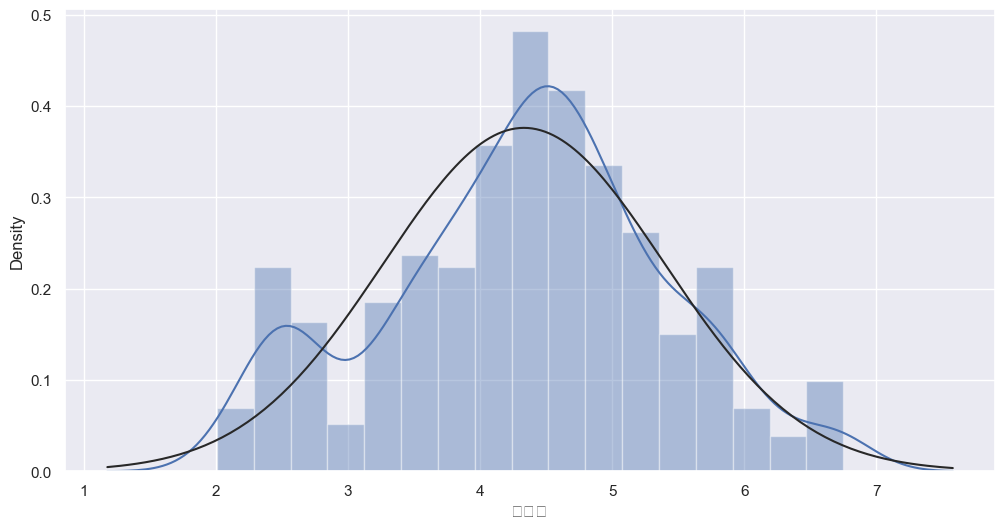

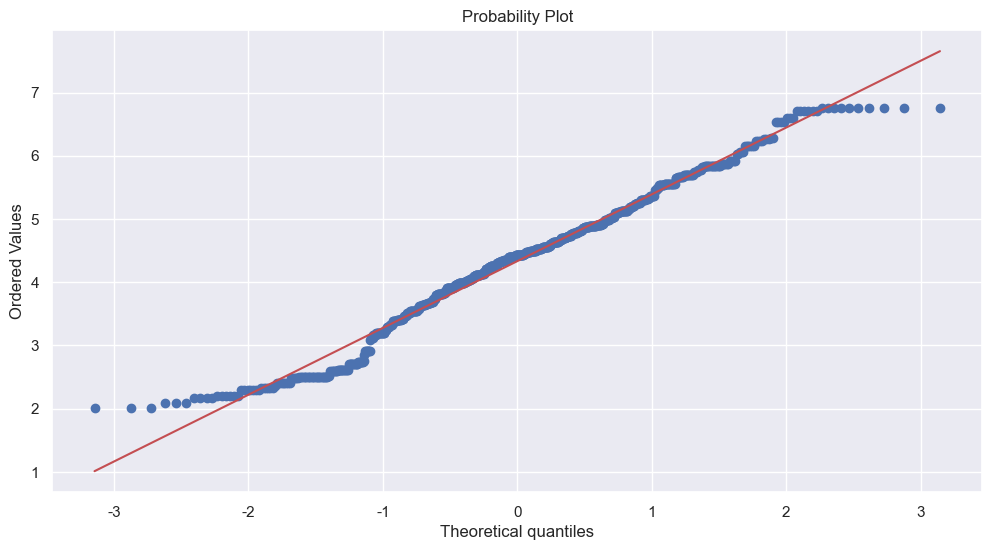

In [376]:
sns.distplot(df4['시청률'] , fit=norm);
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df4['시청률'], plot=plt)
plt.show()

C:\Users\HoJin\AppData\Local\Temp\ipykernel_4888\2531682440.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['조회수'] , fit=norm);
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWa

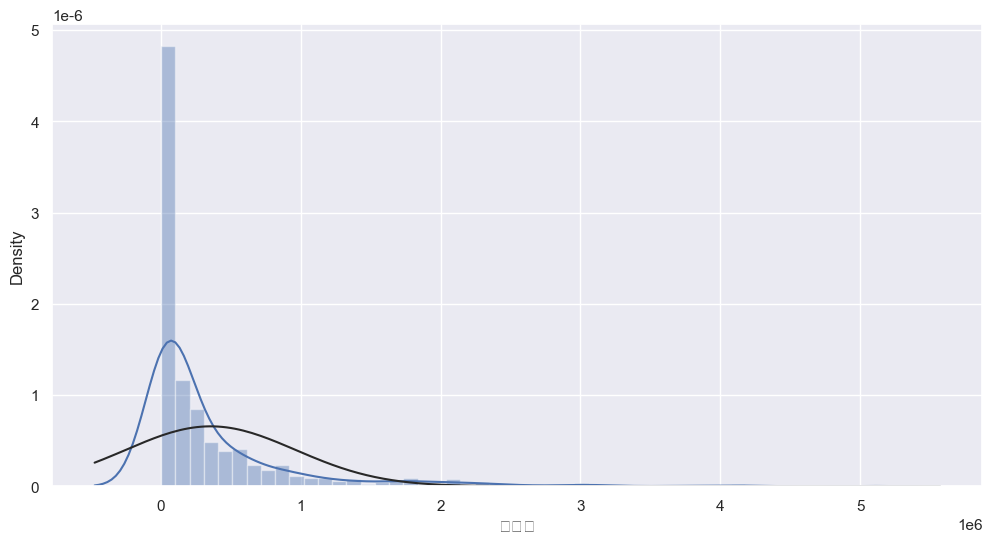

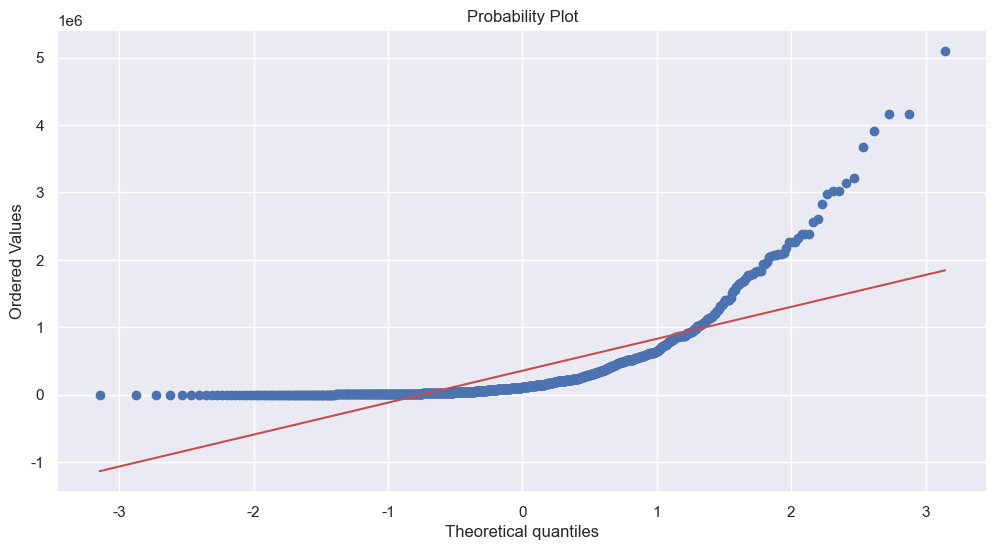

In [377]:
sns.distplot(df4['조회수'] , fit=norm);
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df4['조회수'], plot=plt)
plt.show()

C:\Users\HoJin\AppData\Local\Temp\ipykernel_4888\4126731818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_y , fit=norm);
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning

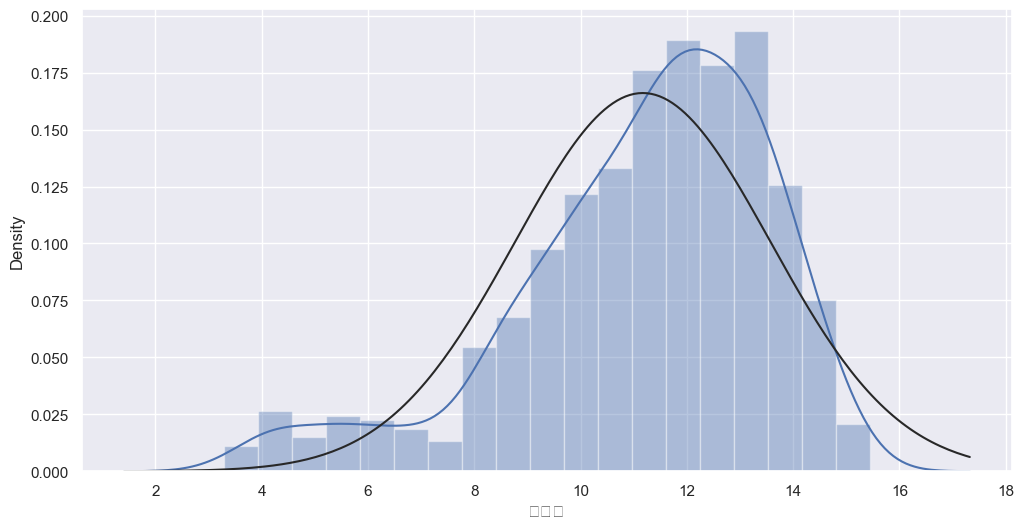

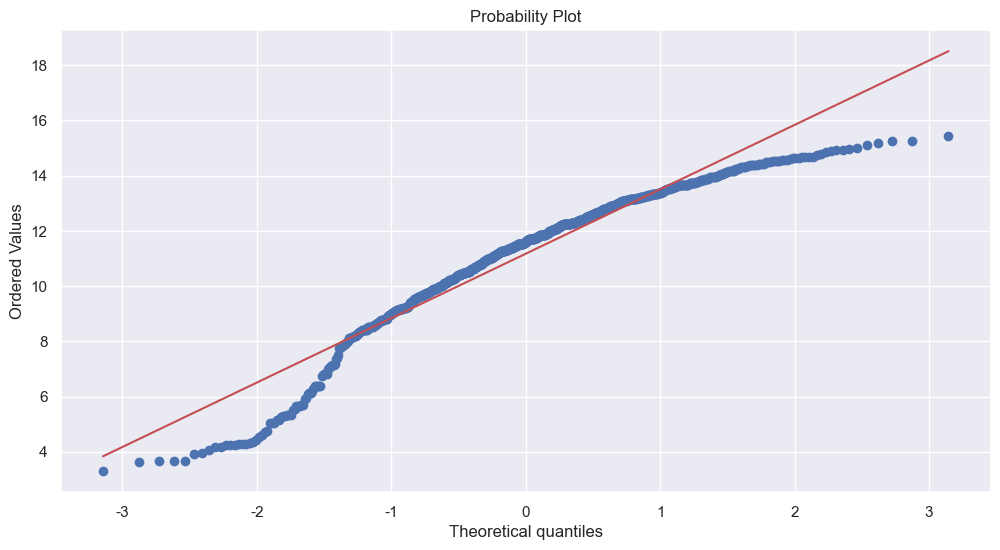

In [371]:
log_y = np.log1p(df4['조회수'])

sns.distplot(log_y , fit=norm);
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(log_y, plot=plt)
plt.show()

##### GBoost 시청률

In [32]:
df3 = df2.copy()
X = df3[['직업', '성별', '나이', '구독자수', '인지도', '재생시간(초)']]
y = df3['시청률']

sc = RobustScaler()       
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [352]:
from sklearn.metrics import mean_squared_error, r2_score

In [359]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# df3 = df2.copy()
# X = df3[['직업', '성별', '나이', '구독자수', '수상여부', '인지도']]
# y = df3[['조회수', '좋아요수', '댓글수', '시청률', '재생시간(초)']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


# GradientBoostingRegressor 모델 생성
gb_regressor = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)

최적의 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
평균 제곱 오차 (MSE): 0.15959967792062352


In [33]:
GBoost = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, min_samples_leaf = 2, min_samples_split =  10, n_estimators = 200)
# 모델 훈련
GBoost.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = GBoost.predict(X_test)
        
y_test = y_test.values.reshape(-1,)
y_pred = y_pred.reshape(-1,)

# MAE 계산
mae = np.mean(np.abs(y_pred - y_test))

# MAPE 계산
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# 결과 출력
print('MAE:', mae)
print('MAPE:', mape)

MAE: 0.2796611068203065
MAPE: 6.376334998603799


##### GBoost 조회수

In [48]:
df3 = df2.copy()
X = df3[['직업', '성별', '나이', '구독자수', '인지도', '재생시간(초)']]
y = df3['조회수']
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [347]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# df3 = df2.copy()
# X = df3[['직업', '성별', '나이', '구독자수', '수상여부', '인지도']]
# y = df3[['조회수', '좋아요수', '댓글수', '시청률', '재생시간(초)']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


# GradientBoostingRegressor 모델 생성
gb_regressor = GradientBoostingRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)

최적의 하이퍼파라미터: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
평균 제곱 오차 (MSE): 462085597178.78125


In [39]:
GBoost = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 3, min_samples_leaf = 1, min_samples_split =  2, n_estimators = 200)
# 모델 훈련
GBoost.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = GBoost.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

MAE: 351866.4990881452
MAPE: 2282.5371149729517


In [49]:
GBoost = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 3, min_samples_leaf = 1, min_samples_split =  2, n_estimators = 200)
# 모델 훈련
GBoost.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = GBoost.predict(X_test)

y_test = y_test.values.reshape(-1,)
y_pred = y_pred.reshape(-1,)

# MAE 계산
mae = np.mean(np.abs(y_pred - y_test))

# MAPE 계산
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# 결과 출력
print('MAE:', mae)
print('MAPE:', mape)

MAE: 1.1406505548193073
MAPE: 11.27273219277419


In [343]:
from sklearn.metrics import mean_squared_error, r2_score

##### XGBoost 시청률

In [35]:
df3 = df2.copy()
X = df3[['직업', '성별', '나이', '구독자수', '수상여부', '인지도']]
y = df3[['시청률']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [351]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# XGBRegressor 모델 생성
xgb_regressor = xgb.XGBRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)

최적의 하이퍼파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
평균 제곱 오차 (MSE): 0.1639369727770908


In [36]:
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.8,learning_rate = 0.2, max_depth = 3, min_child_weight = 1, subsample =  1.0, n_estimators = 200)
# 모델 훈련
xgb_regressor.fit(X_train, y_train)

# 테스트 세트로 예측
y_pred = xgb_regressor.predict(X_test)
        
y_test = y_test.values.reshape(-1,)
y_pred = y_pred.reshape(-1,)

# MAE 계산
mae = np.mean(np.abs(y_pred - y_test))

# MAPE 계산
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# 결과 출력
print('MAE:', mae)
print('MAPE:', mape)

MAE: 0.30411739467004106
MAPE: 7.16963950319575


##### XGBoost 조회수

In [42]:
df3 = df2.copy()
X = df3[['직업', '성별', '나이', '구독자수', '인지도', '재생시간(초)']]
y = df3['조회수']
# y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [381]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# XGBRegressor 모델 생성
xgb_regressor = xgb.XGBRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)

최적의 하이퍼파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
평균 제곱 오차 (MSE): 2.5057212257268406


In [382]:
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.8,learning_rate = 0.1, max_depth = 7, min_child_weight = 1, subsample =  0.8, n_estimators = 200)
# 모델 훈련
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
        
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

2.5999386231161465 0.5261492858151167


In [41]:
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.8,learning_rate = 0.1, max_depth = 7, min_child_weight = 1, subsample =  0.8, n_estimators = 200)
# 모델 훈련
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
        
y_test = y_test.values.reshape(-1,)
y_pred = y_pred.reshape(-1,)

# MAE 계산
mae = np.mean(np.abs(y_pred - y_test))

# MAPE 계산
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# 결과 출력
print('MAE:', mae)
print('MAPE:', mape)

MAE: 1.1249121811601503
MAPE: 11.212931316085625


In [43]:
xgb_regressor = xgb.XGBRegressor(colsample_bytree = 0.8,learning_rate = 0.1, max_depth = 7, min_child_weight = 1, subsample =  0.8, n_estimators = 200)
# 모델 훈련
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)
        
y_test = y_test.values.reshape(-1,)
y_pred = y_pred.reshape(-1,)

# MAE 계산
mae = np.mean(np.abs(y_pred - y_test))

# MAPE 계산
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# 결과 출력
print('MAE:', mae)
print('MAPE:', mape)

MAE: 323278.39263148507
MAPE: 3079.8617597930634


In [384]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

##### lasso

In [390]:
df3 = df2.copy()
X = df3[['직업', '성별', '나이', '구독자수', '인지도', '재생시간(초)']]
y = df3['시청률']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [391]:
# 모델 학습
lasso.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = lasso.predict(X_test)

# 평가 지표 계산 (예시로 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

0.6764393571702504 0.4177841135335746


In [392]:
df3 = df2.copy()
X = df3[['직업', '성별', '나이', '구독자수', '인지도', '재생시간(초)']]
y = df3['조회수']
# y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [393]:
# 모델 학습
lasso.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = lasso.predict(X_test)

# 평가 지표 계산 (예시로 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

374451788873.5205 0.039087578707153514


In [394]:
df3 = df2.copy()
X = df3[['직업', '성별', '나이', '구독자수', '인지도', '재생시간(초)']]
y = df3['조회수']
y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [395]:
# 모델 학습
lasso.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = lasso.predict(X_test)

# 평가 지표 계산 (예시로 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

3.472696722909176 0.36708512744590804


### RandomForestRegressor 조회수

In [16]:
df3 = df2.copy()
X = df3[['직업', '성별', '나이', '구독자수', '인지도', '재생시간(초)']]
y = df3['조회수']
# y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [17]:
rfr = RandomForestRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)

c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_cons

최적의 하이퍼파라미터: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
평균 제곱 오차 (MSE): 359401054119.3845


In [20]:
rfr = RandomForestRegressor(max_depth = None, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)
# 모델 학습
rfr.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rfr.predict(X_test)

# 평가 지표 계산 (예시로 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

363157734144.8827 0.06807020824180643


### RandomForestRegressor 조회수(log O)

In [54]:
df3 = df2.copy()
X = df3[['직업', '성별', '나이', '구독자수', '인지도', '재생시간(초)']]
y = df3['조회수']
# y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

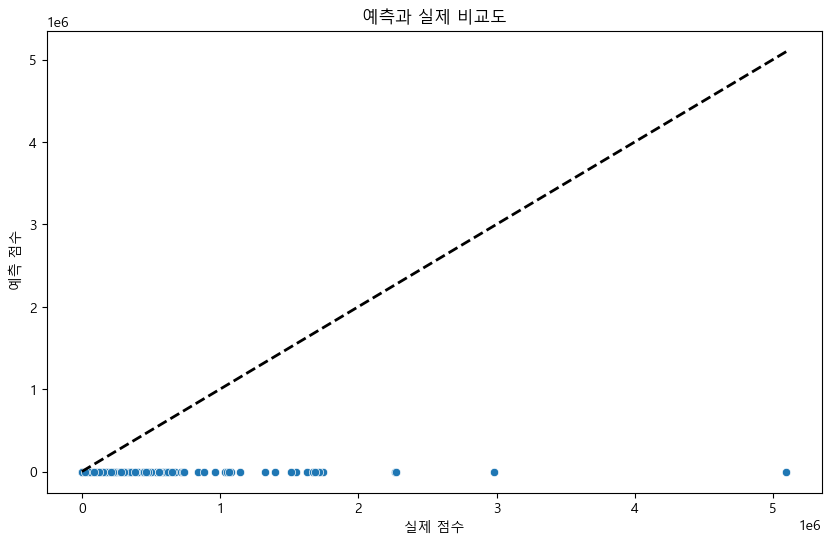

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 조회수 대 예측 조회수 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선 추가
plt.xlabel('실제 점수')
plt.ylabel(' 예측 점수')
plt.title('예측과 실제 비교도')

plt.show()
# 상관이 아니다.

In [23]:
rfr = RandomForestRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)

최적의 하이퍼파라미터: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
평균 제곱 오차 (MSE): 2.4371604997086784


c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_cons

r2_score XXXX
mae

In [24]:
rfr = RandomForestRegressor(max_depth = 10, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
# 모델 학습
rfr.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rfr.predict(X_test)

# 평가 지표 계산 (예시로 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse, r2)

2.4411606517354447 0.5550872978384149


In [51]:
rfr = RandomForestRegressor(max_depth = 10, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
# 모델 학습
rfr.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rfr.predict(X_test)

# 모델 생성 및 학습
rfr = RandomForestRegressor(max_depth = 10, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50, random_state=13)
# y_train = y_train.values.ravel()
rfr.fit(X_train, y_train)

# 예측값 계산
y_pred = rfr.predict(X_test)

y_test = y_test.values.reshape(-1,)
y_pred = y_pred.reshape(-1,)

# MAE 계산
mae = np.mean(np.abs(y_pred - y_test))

# MAPE 계산
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# 결과 출력
print('MAE:', mae)
print('MAPE:', mape)

MAE: 1.1731226080315975
MAPE: 11.66988685617412


### RandomForestRegressor 시청률

In [30]:
df3 = df2.copy()
X = df3[['직업', '성별', '나이', '구독자수', '수상여부', '인지도']]
y = df3[['시청률']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [37]:
rfr = RandomForestRegressor()

# 탐색할 하이퍼파라미터 값들 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
y_train = y_train.values.ravel()
# Grid Search 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델 얻기
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test)

# 평가 지표 출력
mse = mean_squared_error(y_test, y_pred)
print("평균 제곱 오차 (MSE):", mse)

최적의 하이퍼파라미터: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
평균 제곱 오차 (MSE): 0.4020618673929727


c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_cons

In [26]:
rfr = RandomForestRegressor()
# 모델 학습
# y_train = y_train.values.ravel()
rfr.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rfr.predict(X_test)

# 평가 지표 계산 (예시로 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
print(mse)

0.23233070298654637


- MAE : 예측값과 실제값 간의 평균적인 절대 오차를 나타냄 따라서 0에 가까울수록 실제 값에 가깝다고 판단할수있다.

- MAPE : 예측값과 실제값 간의 평균적인 백분율 오차를 나타냄 마찬가지로 0에 가까울 수록 좋다

In [31]:
# 모델 생성 및 학습
rfr = RandomForestRegressor(max_depth = 10, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50, random_state=13)
# y_train = y_train.values.ravel()
rfr.fit(X_train, y_train)

# 예측값 계산
y_pred = rfr.predict(X_test)

y_test = y_test.values.reshape(-1,)
y_pred = y_pred.reshape(-1,)

# MAE 계산
mae = np.mean(np.abs(y_pred - y_test))

# MAPE 계산
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# 결과 출력
print('MAE:', mae)
print('MAPE:', mape)

MAE: 0.45448535456412276
MAPE: 10.394310653205983


c:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


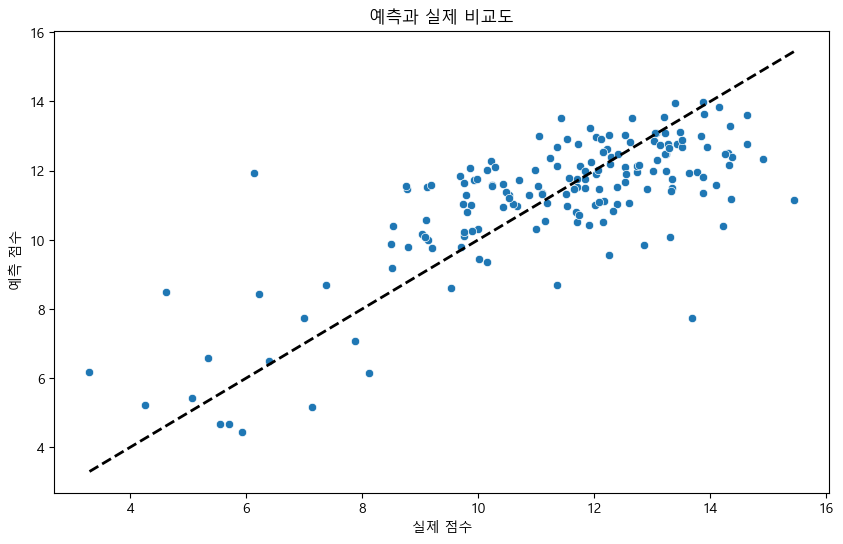

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 조회수 대 예측 조회수 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 대각선 추가
plt.xlabel('실제 점수')
plt.ylabel(' 예측 점수')
plt.title('예측과 실제 비교도')

plt.show()
# 상관이 아니다.